##**Importing the Requisite Libraries**

In [1]:
import csv
import pickle
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.impute import SimpleImputer
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Analysis of the Train Datasets**

##<font color='blue'><b> **Loading the Train Datasets**</b></font>

In [2]:
train_ben= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_Beneficiarydata.csv')
train_inpat= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_Inpatientdata.csv')
train_outpat= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_Outpatientdata.csv')
train_y= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train.csv')

In [ ]:
train_ben.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


In [ ]:
train_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [ ]:
train_inpat.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_inpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [ ]:
train_outpat.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
train_outpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [ ]:
train_y.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
print("Shape of Train Beneficiary file Data:",train_ben.shape)
print("Shape of Train In-patient file Data:", train_inpat.shape)
print("Shape of Train Out-patient file Data:", train_outpat.shape)
print("Shape of Train file Data:", train_y.shape)

Shape of Train Beneficiary file Data: (138556, 25)
Shape of Train In-patient file Data: (40474, 30)
Shape of Train Out-patient file Data: (517737, 27)
Shape of Train file Data: (5410, 2)


In [ ]:
out_prov= np.unique(train_outpat['Provider'])
print("The number of Unique Providers in the Train_Outpat file:", len(out_prov))

in_prov= np.unique(train_inpat['Provider'])
print("The number of Unique Providers in the Train_Inpat file", len(in_prov))

com_prov= set(out_prov).intersection(set(in_prov))
print("The number of Providers common to both the Inpat and Outpat files:",len(com_prov))

uni_ele= len(out_prov)+len(in_prov)-len(com_prov)
print("Total Number of Unique Providers in Outpatient and Inpatient datasets Together:",uni_ele)

The number of Unique Providers in the Train_Outpat file: 5012
The number of Unique Providers in the Train_Inpat file 2092
The number of Providers common to both the Inpat and Outpat files: 1694
Total Number of Unique Providers in Outpatient and Inpatient datasets Together: 5410


##<font color='green'><b> **Observations on the Train Datasets**</b></font>

1. We observed that the labels of Potential Fraud as "Yes" or "No" have been  provided to the each of the Providers in the dataset.

2. The number of Unique Providers in the Dataset is 5410 as can be seen in the  "Train" file.

3. Hence,checking for the unique Providers in the Inpatient and the Outpatient files.

4. From the above, we observed that that the total number of Providers are spread across the Inpatient and Outpatient Files.


###<font color='blue'><b>**Looking at the diffeerent columns present in each of the datasets**</b></font>

In [ ]:
print("The columns in the Outpatient Dataset are:",train_outpat.columns)
print("="*100)
print("The columns in the Inpatient Dataset are:",train_inpat.columns)
print("="*100)
print("The columns in the Beneficiary Dataset are:",train_ben.columns)

The columns in the Outpatient Dataset are: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')
The columns in the Inpatient Dataset are: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
  

###<font color='blue'><b>Checking for common columns between the Outpatient and the Ipatient datasets seperately </b></font>

In [ ]:
#Checking each of the columns in the Outaptient dataset if they are present in the Inpatient Dataset
c_o=[]
for o in train_outpat.columns:
    if o in train_inpat.columns:
        c_o.append(o)

#Checking each of the columns in the Inpatient dataset if they are present in the Outpatient dataset
c_i=[]
for i in train_inpat.columns:
    if i in train_outpat.columns:
        c_i.append(i)
print("Cols of Outpatient dataset also present in Inpatient dataset",len(c_o))
print("Cols of Inpatient dataset also present in Outpatient dataset",len(c_i))

#Checking for common column names in the outpatient and the inpatient datasets 
c_s= set(c_o).intersection(set(c_i))
c_s= list(c_s)
print("Common columns between the outpatient and the inpatient datasets",len(c_s))

Cols of Outpatient dataset also present in Inpatient dataset 27
Cols of Inpatient dataset also present in Outpatient dataset 27
Common columns between the outpatient and the inpatient datasets 27


In [ ]:
print(c_s)

['BeneID', 'ClmProcedureCode_1', 'ClmDiagnosisCode_3', 'OperatingPhysician', 'ClaimStartDt', 'ClmProcedureCode_4', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_8', 'OtherPhysician', 'ClmProcedureCode_3', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_9', 'ClmProcedureCode_5', 'AttendingPhysician', 'ClmDiagnosisCode_5', 'ClmProcedureCode_6', 'ClmProcedureCode_2', 'ClmDiagnosisCode_10', 'ClaimEndDt', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_6', 'Provider', 'ClaimID', 'InscClaimAmtReimbursed', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_4']


###<font color='blue'><b> Merging the Outpatient and the Inpatient datasets based on the common columns between both the datasets. We will be doing an outer merge as we need to take the union of all the elements in both the datasets </b></font> 

In [ ]:
train_fin_df= pd.merge(train_inpat,train_outpat,left_on=c_s,right_on=c_s,how='outer')
train_fin_df.shape

(558211, 30)

In [ ]:
train_fin_df.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


###<font color='blue'><b>Merging the resultant dataset with Beneficiary data on the BeneID column in both teh datasets</b></font>

In [ ]:
train_fin= pd.merge(train_fin_df,train_ben, left_on='BeneID',right_on= 'BeneID',how='outer')
train_fin.shape

(558211, 54)

In [ ]:
print("The columns in the final merged dataset are:",train_fin.columns)

The columns in the final merged dataset are: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',

###<font color='blue'><b>Merging the Y variable with the final dataset</b></font>

In [ ]:
train_fin= pd.merge(train_fin,train_y,left_on= 'Provider',right_on='Provider',how='outer')
train_fin.shape

(558211, 55)

In [ ]:
train_fin.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [ ]:
train_fin.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,NaN,0.0,NaN,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaN,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,1930-07-01,NaN,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,Yes


###<font color="blue"><b>Checking for the datatypes of all the columns in the final dataset</b></font>

In [ ]:
train_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [ ]:
#Storing the final dataframe as a pickled file
with open('/content/drive/MyDrive/Colab Notebooks/train_fin.pkl','wb') as tr_df:
    pickle.dump(train_fin,tr_df)

In [ ]:
#Loading the pickled file
with open('/content/drive/MyDrive/Colab Notebooks/train_fin.pkl','rb') as tr_df:
    train_fin= pickle.load(tr_df)

In [ ]:
train_fin.shape

(558211, 55)

##<font color='blue'><b>**Splitting the Data into Train and Cross Validate Datasets**</b></font>

In [ ]:
y= train_fin['PotentialFraud']
train_fin.drop(['PotentialFraud'],axis=1, inplace= True)

In [ ]:
train_fin,cv_fin,train_y,cv_y= train_test_split(train_fin,y,test_size=0.2,stratify=y,random_state=42)
print(train_fin.shape)
print(train_y.shape)
print(cv_fin.shape)
print(cv_y.shape)

(446568, 54)
(446568,)
(111643, 54)
(111643,)


In [ ]:
train_fin.reset_index(drop=True,inplace=True)
cv_fin.reset_index(drop=True,inplace=True)

In [ ]:
train_fin.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE22189,CLM164897,2009-01-29,2009-01-29,PRV54273,90,PHY419362,NaN,PHY384386,NaN,25000,0.0,NaN,NaN,V4585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938-06-01,NaN,2,1,0,25,170,12,12,2,2,1,2,2,1,1,1,1,2,2,5030,1068,1090,560
1,BENE156743,CLM79687,2009-12-15,2009-12-21,PRV56438,5000,PHY410043,NaN,NaN,2009-12-15,486,1068.0,2009-12-21,628,2768,5849,5856,4019,1991,3310,7868,30000,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1936-08-01,NaN,1,1,Y,11,921,12,12,1,2,1,2,2,2,1,1,2,2,2,5000,1068,70,0
2,BENE157334,CLM724410,2009-12-11,2009-12-31,PRV53918,400,PHY351111,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V570,83300,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930-12-01,NaN,1,1,0,23,490,12,12,2,1,2,2,2,2,1,1,2,1,1,0,0,3870,540
3,BENE30606,CLM580231,2009-09-15,2009-09-15,PRV55004,30,PHY342769,NaN,PHY371896,NaN,NaN,0.0,NaN,NaN,7235,7820,72281,72251,7210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956-09-01,NaN,2,2,0,33,331,12,12,2,2,1,2,2,1,2,2,1,2,2,3000,1068,1680,140
4,BENE11648,CLM76557,2009-11-19,2009-11-22,PRV51149,2000,PHY332294,PHY332294,NaN,2009-11-19,42823,1068.0,2009-11-22,236,39891,4168,2768,V1582,2809,2724,42823,78057,V1254,NaN,17.0,NaN,NaN,NaN,NaN,NaN,1927-10-01,NaN,2,1,0,3,60,12,12,1,1,2,2,2,2,2,1,2,2,2,2000,1068,1160,650


##<font color='blue'><b> **Looking at the Class Distribution in the Train Dataset**</b></font>

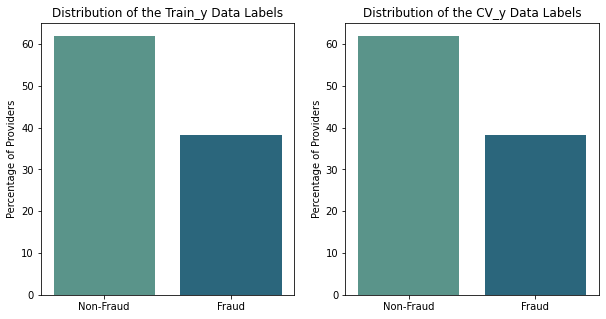

In [ ]:
#Calculating the number of row items where the Provider is NOT a Potentila fraud in percentage terms
tr_no_per= np.round((train_y.value_counts()[0])/(train_y.value_counts()[0]+train_y.value_counts()[1]),3)*100

#Calculating the number of row items where the Provider is a Potentila fraud in percentage terms
tr_yes_per= np.round((train_y.value_counts()[1])/(train_y.value_counts()[0]+train_y.value_counts()[1]),3)*100


#Calculating the number of row items where the Provider is NOT a Potentila fraud in percentage terms
cv_no_per= np.round((cv_y.value_counts()[0])/(cv_y.value_counts()[0]+cv_y.value_counts()[1]),3)*100

#Calculating the number of row items where the Provider is a Potentila fraud in percentage terms
cv_yes_per= np.round((cv_y.value_counts()[1])/(cv_y.value_counts()[0]+cv_y.value_counts()[1]),3)*100

#Plotting the Potential and Non Potential Fraud scenarios
fig= plt.figure(figsize=(10,5))
gs= GridSpec(1,2, figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

sns.barplot(ax= ax1,x=['Non-Fraud',"Fraud"],y= [tr_no_per,tr_yes_per],palette='crest')
sns.barplot(ax= ax2,x=['Non-Fraud',"Fraud"],y= [cv_no_per,cv_yes_per],palette='crest')


ax1.title.set_text("Distribution of the Train_y Data Labels")
ax2.title.set_text("Distribution of the CV_y Data Labels")
ax1.set_ylabel("Percentage of Providers")
ax2.set_ylabel("Percentage of Providers")

plt.show()

##<font color='green'><b>**Observations**</b></font>
1. We see that there are is a 60:40 split between the number of observations belonging to the Non-Fraud class and the Fraud class.

2. Using the Stratify option in the Train-Test split has ensured that class distribution of the observationn belongig to the Non-Fraud and Fraud cases has remained the same in both Train and CV datasets

In [ ]:
print("Percenatage of Non-Fraud class in Train dataset:",tr_no_per,'%')
print("Percenatage of Fraud class in Train dataset:",tr_yes_per,'%')
print("Percenatage of Non-Fraud class in Cross Validate dataset:",cv_no_per,'%')
print("Percenatage of Fraud class in Cross Validate dataset:",cv_yes_per,'%')

Percenatage of Non-Fraud class in Train dataset: 61.9 %
Percenatage of Fraud class in Train dataset: 38.1 %
Percenatage of Non-Fraud class in Cross Validate dataset: 61.9 %
Percenatage of Fraud class in Cross Validate dataset: 38.1 %


##<font color='blue'><b>**Checking for the percentage of nan values in each of the columns in the Train Data**</b></font>

In [ ]:
na_perc= np.round(((train_fin.isna().sum())/train_fin.shape[0])*100,2)
na_perc_df= na_perc.to_frame()
na_perc_df.reset_index(inplace= True)
na_perc_df.columns= ["col_name","na_percentage"]
print(na_perc_df)

                           col_name  na_percentage
0                            BeneID           0.00
1                           ClaimID           0.00
2                      ClaimStartDt           0.00
3                        ClaimEndDt           0.00
4                          Provider           0.00
5            InscClaimAmtReimbursed           0.00
6                AttendingPhysician           0.27
7                OperatingPhysician          79.50
8                    OtherPhysician          64.24
9                       AdmissionDt          92.72
10            ClmAdmitDiagnosisCode          73.88
11                DeductibleAmtPaid           0.16
12                      DischargeDt          92.72
13               DiagnosisGroupCode          92.72
14               ClmDiagnosisCode_1           1.86
15               ClmDiagnosisCode_2          35.04
16               ClmDiagnosisCode_3          56.47
17               ClmDiagnosisCode_4          70.52
18               ClmDiagnosisCo

In [ ]:
#Isolating the column numbers where the NA percentage is Zero
na_col=[]
na_perc= np.round(((train_fin.isna().sum())/train_fin.shape[0])*100,2)
na_perc_df= na_perc.to_frame()
na_perc_df.reset_index(inplace= True)
na_perc_df.columns= ["col_name","na_percentage"]
for i in range(na_perc_df.shape[0]):
    if na_perc_df.iloc[i,1] == 0:
        na_col.append(i)  

print(na_col)

[0, 1, 2, 3, 4, 5, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]


In [ ]:
#Deleting the columns with 0% NA from the newly created na_perc_df dataframe
na_perc_df.drop(index=na_col,inplace=True)
na_perc_df.reset_index(drop=True,inplace=True)
print(na_perc_df)

                 col_name  na_percentage
0      AttendingPhysician           0.27
1      OperatingPhysician          79.50
2          OtherPhysician          64.24
3             AdmissionDt          92.72
4   ClmAdmitDiagnosisCode          73.88
5       DeductibleAmtPaid           0.16
6             DischargeDt          92.72
7      DiagnosisGroupCode          92.72
8      ClmDiagnosisCode_1           1.86
9      ClmDiagnosisCode_2          35.04
10     ClmDiagnosisCode_3          56.47
11     ClmDiagnosisCode_4          70.52
12     ClmDiagnosisCode_5          79.93
13     ClmDiagnosisCode_6          84.86
14     ClmDiagnosisCode_7          88.13
15     ClmDiagnosisCode_8          90.42
16     ClmDiagnosisCode_9          92.50
17    ClmDiagnosisCode_10          99.09
18     ClmProcedureCode_1          95.80
19     ClmProcedureCode_2          99.02
20     ClmProcedureCode_3          99.83
21     ClmProcedureCode_4          99.98
22     ClmProcedureCode_5         100.00
23     ClmProced

##<font color='blue'><b>**Checking for the percentage of nan values in each of the columns in the CV Data**</b></font>

In [ ]:
na_perc_cv= np.round(((cv_fin.isna().sum())/cv_fin.shape[0])*100,2)
na_perc_df_cv= na_perc_cv.to_frame()
na_perc_df_cv.reset_index(inplace= True)
na_perc_df_cv.columns= ["col_name","na_percentage"]
print(na_perc_df_cv)

                           col_name  na_percentage
0                            BeneID           0.00
1                           ClaimID           0.00
2                      ClaimStartDt           0.00
3                        ClaimEndDt           0.00
4                          Provider           0.00
5            InscClaimAmtReimbursed           0.00
6                AttendingPhysician           0.27
7                OperatingPhysician          79.47
8                    OtherPhysician          64.13
9                       AdmissionDt          92.88
10            ClmAdmitDiagnosisCode          73.80
11                DeductibleAmtPaid           0.16
12                      DischargeDt          92.88
13               DiagnosisGroupCode          92.88
14               ClmDiagnosisCode_1           1.92
15               ClmDiagnosisCode_2          35.04
16               ClmDiagnosisCode_3          56.43
17               ClmDiagnosisCode_4          70.53
18               ClmDiagnosisCo

In [ ]:
na_col_cv=[]
na_perc_cv= np.round(((cv_fin.isna().sum())/cv_fin.shape[0])*100,2)
na_perc_df_cv= na_perc_cv.to_frame()
na_perc_df_cv.reset_index(inplace= True)
na_perc_df_cv.columns= ["col_name","na_percentage"]
for i in range(na_perc_df_cv.shape[0]):
    if na_perc_df_cv.iloc[i,1] == 0:
        na_col_cv.append(i)  

print(na_col_cv)

[0, 1, 2, 3, 4, 5, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]


In [ ]:
na_perc_df_cv.drop(index=na_col_cv,inplace=True)
na_perc_df_cv.reset_index(drop=True,inplace=True)
print(na_perc_df_cv)

                 col_name  na_percentage
0      AttendingPhysician           0.27
1      OperatingPhysician          79.47
2          OtherPhysician          64.13
3             AdmissionDt          92.88
4   ClmAdmitDiagnosisCode          73.80
5       DeductibleAmtPaid           0.16
6             DischargeDt          92.88
7      DiagnosisGroupCode          92.88
8      ClmDiagnosisCode_1           1.92
9      ClmDiagnosisCode_2          35.04
10     ClmDiagnosisCode_3          56.43
11     ClmDiagnosisCode_4          70.53
12     ClmDiagnosisCode_5          80.02
13     ClmDiagnosisCode_6          84.95
14     ClmDiagnosisCode_7          88.21
15     ClmDiagnosisCode_8          90.45
16     ClmDiagnosisCode_9          92.56
17    ClmDiagnosisCode_10          99.14
18     ClmProcedureCode_1          95.91
19     ClmProcedureCode_2          99.02
20     ClmProcedureCode_3          99.83
21     ClmProcedureCode_4          99.98
22     ClmProcedureCode_5         100.00
23     ClmProced

##<font color='blue'><b> Analysis of the presence of hihg percentage of NA values in the Claim Procedure variables using barplots</b></font>

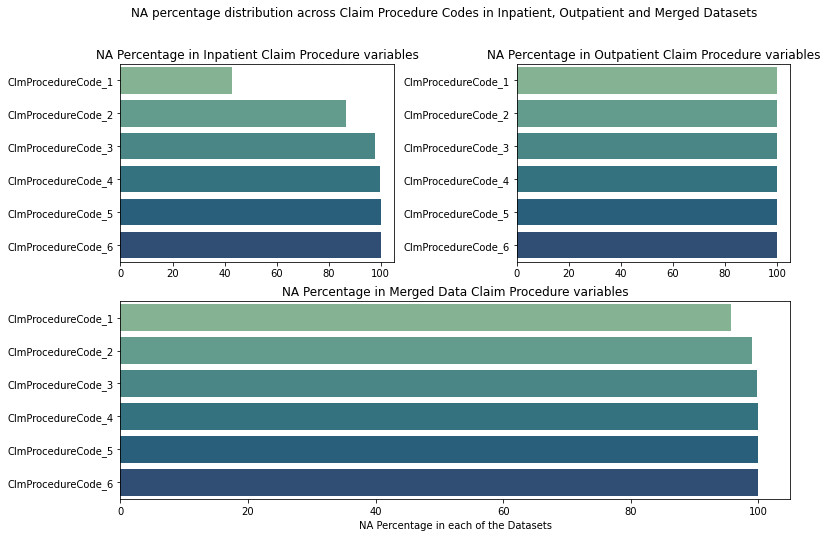

In [ ]:
clm_proc= ['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']
clm_proc_in=[]
clm_proc_out=[]
clm_proc_mer=[]

for i in clm_proc:
    clm_proc_in.append(np.round((train_inpat[i].isna().sum()/len(train_inpat[i]))*100,2))
    clm_proc_out.append(np.round((train_outpat[i].isna().sum()/len(train_outpat[i]))*100,2))
    clm_proc_mer.append(np.round((train_fin[i].isna().sum()/len(train_fin[i]))*100,2))

fig= plt.figure(figsize=(12,8))
gs= GridSpec(2,2,figure= fig)

fig.suptitle('NA percentage distribution across Claim Procedure Codes in Inpatient, Outpatient and Merged Datasets')
ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,:])

sns.barplot(ax=ax1,y= clm_proc,x= clm_proc_in, palette='crest')
sns.barplot(ax=ax2,y= clm_proc,x= clm_proc_out,palette='crest')
sns.barplot(ax=ax3,y= clm_proc,x= clm_proc_mer,palette='crest')

ax1.title.set_text('NA Percentage in Inpatient Claim Procedure variables')
ax2.title.set_text('NA Percentage in Outpatient Claim Procedure variables')
ax3.title.set_text('NA Percentage in Merged Data Claim Procedure variables')

plt.subplots_adjust(wspace=0.45)
plt.xlabel("NA Percentage in each of the Datasets")
plt.show()

##<font color='green'><b>**Observations**</b></font>

#### 1. We see that there are 100% NA values in the Outpatient dataset in all of the claim Procedure columns. This is because most of the outpatients do not undergo procedures.

#### 2. In case of a need for a complex procedure, the patients are admitted and are treated as inpatients

#### 3. High percenatge of the NA values in the merged datasets is not due to missing data but due to the reason that the size of the Outpatient dataset is much higher than the Inpatient dataset

#### 4. As most of the outptient dataset claim procedure has a high values of NA, they are introducing skewness in the merged dataset.

##<font color='red'><b> **Feature Engineering**
#### 1. Each of the cliam procedure codes indicates a different procedure hence the counting the number of procedured performed effectively captures the information carried by the 6 different claim procedure columns.

#### 2. I have created a new feature capturing the number of procedures performed for each of the patients. Higher the number of procedures it is highly likely that higher is the complexity of the case. 

In [ ]:
clm_proc= ['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']

In [ ]:
#Isolating all the claim procedure columnns of the train and crossvalidate datasets into seperate dataframes
tr_clm_pr= train_fin[clm_proc]
cv_clm_pr= cv_fin[clm_proc]
print(tr_clm_pr.shape)
print(cv_clm_pr.shape)

(446568, 6)
(111643, 6)


In [ ]:
#Creating a new column called '#_Procedures' to save the counts for each row where the counts of the non-nan values in each of the clm_proc are stored
tr_clm_pr['#_Procedures']= np.zeros(len(train_fin['ClmProcedureCode_1']))

for i in tqdm(range(len(tr_clm_pr['ClmProcedureCode_1']))):
    count= 0
    for j in range(len(clm_proc)):
        if pd.isnull(tr_clm_pr.iloc[i,j])== False:
            count=count+1
    
    tr_clm_pr['#_Procedures'][i]= count

100%|██████████| 446568/446568 [02:04<00:00, 3597.97it/s]


In [ ]:
tr_clm_pr['#_Procedures'].describe()

count    446568.000000
mean          0.053786
std           0.281055
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: #_Procedures, dtype: float64

In [ ]:
cv_clm_pr['#_Procedures']= np.zeros(len(cv_fin['ClmProcedureCode_1']))

#Looping through each of the claim procedure columns and each of the observations
#Counting the number of non-na values in each of the clm_proc columns in the each of the obs
#Storing the count values in a seperate column titled '#_Procedures'
for i in tqdm(range(len(cv_clm_pr['ClmProcedureCode_1']))):
    count= 0
    for j in range(len(clm_proc)):
        if pd.isnull(cv_clm_pr.iloc[i,j])== False:
            count=count+1
    
    cv_clm_pr['#_Procedures'][i]= count

100%|██████████| 111643/111643 [00:31<00:00, 3580.01it/s]


In [ ]:
cv_clm_pr['#_Procedures'].describe()

count    111643.000000
mean          0.052641
std           0.278442
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: #_Procedures, dtype: float64

In [ ]:
train_fin['#_Procedures']= tr_clm_pr['#_Procedures']
cv_fin['#_Procedures']= cv_clm_pr['#_Procedures']

In [ ]:
print(np.unique(train_fin['#_Procedures']))
print(np.unique(cv_fin['#_Procedures']))

[0. 1. 2. 3. 4. 5.]
[0. 1. 2. 3. 4. 5.]


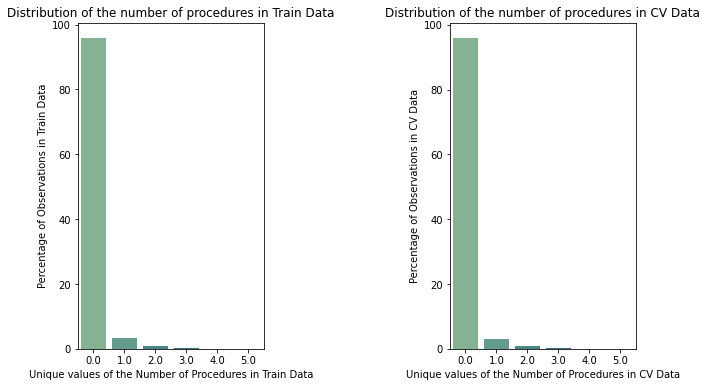

In [ ]:
uni_proc_tr= np.unique(train_fin['#_Procedures'])
uni_proc_cv= np.unique(cv_fin['#_Procedures'])

tr_proc_counts= np.round((train_fin['#_Procedures'].value_counts()/len(train_fin['#_Procedures']))*100,2)
cv_proc_counts= np.round((cv_fin['#_Procedures'].value_counts()/len(cv_fin['#_Procedures']))*100,2)

fig= plt.figure(figsize=(10,6))
gs= GridSpec(1,2,figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

sns.barplot(ax= ax1,y= tr_proc_counts, x= uni_proc_tr, palette= 'crest')
sns.barplot(ax= ax2,y= cv_proc_counts, x= uni_proc_cv, palette= 'crest')

ax1.set_ylabel("Percentage of Observations in Train Data")
ax2.set_ylabel("Percentage of Observations in CV Data")

ax1.set_xlabel('Unique values of the Number of Procedures in Train Data')
ax2.set_xlabel('Unique values of the Number of Procedures in CV Data')

ax1.set_title("Distribution of the number of procedures in Train Data")
ax2.set_title("Distribution of the number of procedures in CV Data")
plt.subplots_adjust(wspace=1)
plt.show()

##<font color='green'><b>**Observations**</b></font>
1. As can be seen from the above plot that more than 95% of the precedures have '0' procedures, followed by 1 procedure and so on. 

2. This drastic skewnwess in the data could be due to the fact that the Outpatient dataset is dominant in the overall merged dataset and in majority of the Outpatient cases, the patients do not go through any prcedures.

3. In addition to point 2, as most procedures require prepping the patient or stabilizing the patient before the procedure could take 1-2 days hence the patient is most likely to be admitted and treated as an inpatient before carrying out a procedure barring from a very few procedures

In [ ]:
train_fin3['#_Procedures'].value_counts()/len(train_fin3['#_Procedures'])

0.0    0.958036
1.0    0.032116
2.0    0.008113
3.0    0.001516
4.0    0.000202
5.0    0.000018
Name: #_Procedures, dtype: float64

###<font color='blue'><b> Dropping the 6 Claim procedure code variables</b></font>

In [ ]:
train_fin.drop(clm_proc, axis=1, inplace= True)
cv_fin.drop(clm_proc, axis=1, inplace= True)

###<font color='blue'><b> Analysis of the presence of hihg percentage of NA values in the Claim Diagnosis variables using barplots</b></font>

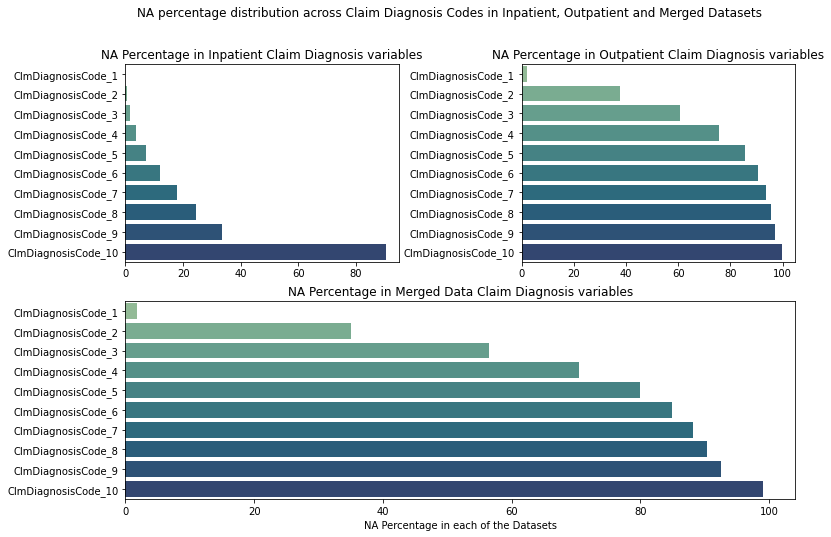

In [ ]:
clm_diag= ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']
clm_diag_nai=[]
clm_diag_nao=[]
clm_diag_na=[]

for i in clm_diag:
    clm_diag_nai.append(np.round((train_inpat[i].isna().sum()/len(train_inpat[i]))*100,2))
    clm_diag_nao.append(np.round((train_outpat[i].isna().sum()/len(train_outpat[i]))*100,2))
    clm_diag_na.append(np.round((train_fin[i].isna().sum()/len(train_fin[i]))*100,2))

fig= plt.figure(figsize=(12,8))
gs= GridSpec(2,2,figure= fig)

fig.suptitle('NA percentage distribution across Claim Diagnosis Codes in Inpatient, Outpatient and Merged Datasets')
ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,:])

sns.barplot(ax=ax1,y= clm_diag,x= clm_diag_nai,palette='crest')
sns.barplot(ax=ax2,y= clm_diag,x= clm_diag_nao,palette='crest')
sns.barplot(ax=ax3,y= clm_diag,x= clm_diag_na,palette='crest')

ax1.title.set_text('NA Percentage in Inpatient Claim Diagnosis variables')
ax2.title.set_text('NA Percentage in Outpatient Claim Diagnosis variables')
ax3.title.set_text('NA Percentage in Merged Data Claim Diagnosis variables')

plt.subplots_adjust(wspace=0.45)
plt.xlabel("NA Percentage in each of the Datasets")
plt.show()

##<font color='green'><b>**Observations**</b></font>

#### 1. Very similar observations as the Claims Procedure variable. Even in this case the reasons for the NA values are similar as in the case of ClaimsProcedures variable

###<font color='red'><b>**Feature Engineering**</b></font>

#### As employed in the case of Claims Procedure I will be creating a new column called the no.of.diagnosis

#### Higher the number of Diagnosis the higher is the complexity of the patients diagnosis.


In [ ]:
clm_diag= ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']

In [ ]:
tr_clm_dg= train_fin[clm_diag]
cv_clm_dg= cv_fin[clm_diag]
print(tr_clm_dg.shape)
print(cv_clm_dg.shape)

(446568, 10)
(111643, 10)


In [ ]:
tr_clm_dg['#_DiagnosisCodes']= np.zeros(len(tr_clm_dg['ClmDiagnosisCode_1']))

#Looping through each of the claim diagnosis columns and each of the observations
#Counting the number of non-na values in each of the clm_diag columns in the each of the obs
#Storing the count values in a seperate column titled '#_DiagnosisCodes'
for i in tqdm(range(len(tr_clm_dg['ClmDiagnosisCode_1']))):
    count= 0
    for j in range(len(clm_diag)):
        if pd.isnull(tr_clm_dg.iloc[i,j])== False:
            count=count+1
    
    tr_clm_dg['#_DiagnosisCodes'][i]= count

100%|██████████| 446568/446568 [03:09<00:00, 2357.77it/s]


In [ ]:
tr_clm_dg['#_DiagnosisCodes'].describe()

count    446568.000000
mean          3.011736
std           2.449265
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: #_DiagnosisCodes, dtype: float64

In [ ]:
cv_clm_dg['#_DiagnosisCodes']= np.zeros(len(cv_clm_dg['ClmDiagnosisCode_1']))

#Looping through each of the claim diagnosis columns and each of the observations
#Counting the number of non-na values in each of the clm_diag columns in the each of the obs
#Storing the count values in a seperate column titled '#_DiagnosisCodes'
for i in tqdm(range(len(cv_clm_dg['ClmDiagnosisCode_1']))):
    count= 0
    for j in range(len(clm_diag)):
        if pd.isnull(cv_clm_dg.iloc[i,j])== False:
            count=count+1
    
    cv_clm_dg['#_DiagnosisCodes'][i]= count

100%|██████████| 111643/111643 [00:47<00:00, 2351.12it/s]


In [ ]:
cv_clm_dg['#_DiagnosisCodes'].describe()

count    111643.000000
mean          3.007542
std           2.444012
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: #_DiagnosisCodes, dtype: float64

In [ ]:
train_fin['#_DiagnosisCodes']= tr_clm_dg['#_DiagnosisCodes']
cv_fin['#_DiagnosisCodes']= cv_clm_dg['#_DiagnosisCodes']

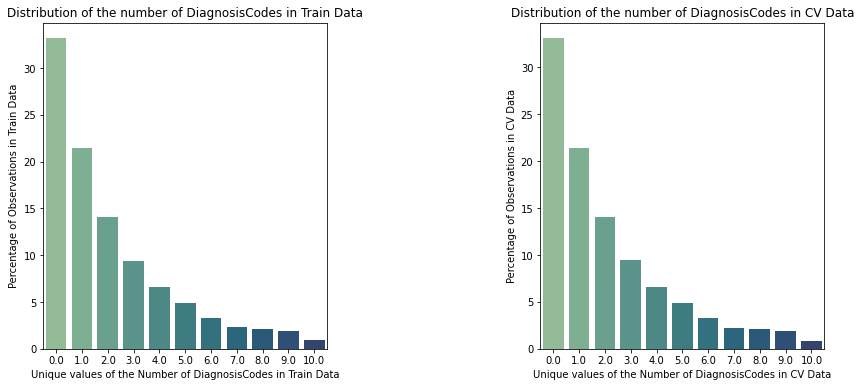

In [ ]:
uni_diag_tr= np.unique(train_fin['#_DiagnosisCodes'])
uni_diag_cv= np.unique(cv_fin['#_DiagnosisCodes'])

tr_diag_counts= np.round((train_fin['#_DiagnosisCodes'].value_counts()/len(train_fin['#_DiagnosisCodes']))*100,2)
cv_diag_counts= np.round((cv_fin['#_DiagnosisCodes'].value_counts()/len(cv_fin['#_DiagnosisCodes']))*100,2)

fig= plt.figure(figsize=(14,6))
gs= GridSpec(1,2,figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

sns.barplot(ax= ax1,y= tr_diag_counts, x= uni_diag_tr, palette= 'crest')
sns.barplot(ax= ax2,y= cv_diag_counts, x= uni_diag_cv, palette= 'crest')

ax1.set_ylabel("Percentage of Observations in Train Data")
ax2.set_ylabel("Percentage of Observations in CV Data")

ax1.set_xlabel('Unique values of the Number of DiagnosisCodes in Train Data')
ax2.set_xlabel('Unique values of the Number of DiagnosisCodes in CV Data')

ax1.set_title("Distribution of the number of DiagnosisCodes in Train Data")
ax2.set_title("Distribution of the number of DiagnosisCodes in CV Data")
plt.subplots_adjust(wspace=0.75)
plt.show()

##<font color='green'><b>**Observations**</b></font>

1. We see that percentage of the observations belonging to the number of the diagnosis codes keeps reducing. 

2. This is in agreement with the general phenomenon that more the number of diagnosis codes more complex the ailment of the patient.

3. Patients with severe ailments are usually inpatients and the number of cases in which the ailment is severe is also low.

###<font color='blue'><b> Dropping the 10 Claim Diagnosis codes variables</b></font>

In [ ]:
train_fin.drop(clm_diag,axis=1,inplace= True)
cv_fin.drop(clm_diag,axis=1,inplace= True)

###<font color='blue'><b>Checking the number of NA values in the Outpatient Dataset just to validate our obsevrations and the feature engineering approach

In [ ]:
print("The NA percentage in the Admission Date variable in Inpatient Data",(train_inpat['AdmissionDt'].isna().sum()/len(train_inpat['AdmissionDt']))*100)
print("The NA percentage in the Discharge Date variable in Inpatient Data",(train_inpat['DischargeDt'].isna().sum()/len(train_inpat['DischargeDt']))*100)

The NA percentage in the Admission Date variable in Inpatient Data 0.0
The NA percentage in the Discharge Date variable in Inpatient Data 0.0


##<font color='green'>**Observations**</b></font>

#### Although we see that Admission Date and the Discharge Date have an NA percentage of 92.5, from the above we see that all the NA values have been added by Outpatient and Beneficary datasets.

#### It needs to be noted that AdmissionDate and DischargeDate columns are bound to be missing in the Inpatient Datasets and the Beneficary Datasets.


##<font color='red'><b>**Feature Engineering**</b></font>
#### I have created a new feature titled "hospital_days" which is taken as a difference between the Discharge Date and the Admission Date features.

#### I have imputed all the missing values in this feature with Zeros.

#### I have categorized the "HospitalDays" feature as keeping it a floating point value will introduce too many features and affect the overall distribution of the variable 

In [ ]:
train_fin["HospitalDays"]= pd.to_datetime(train_fin['DischargeDt']) - pd.to_datetime(train_fin['AdmissionDt'])
train_fin["HospitalDays"]= train_fin["HospitalDays"].dt.days

In [ ]:
cv_fin["HospitalDays"]= pd.to_datetime(cv_fin['DischargeDt']) - pd.to_datetime(cv_fin['AdmissionDt'])
cv_fin["HospitalDays"]= cv_fin["HospitalDays"].dt.days

###<font color='blue'><b>Looking at the distribution of the HospitalDays variable prior to the imputation of the NA values with 0</b></font>

In [ ]:
train_fin["HospitalDays"].describe()

count    32529.00000
mean         5.67303
std          5.65132
min          0.00000
25%          2.00000
50%          4.00000
75%          7.00000
max         35.00000
Name: HospitalDays, dtype: float64

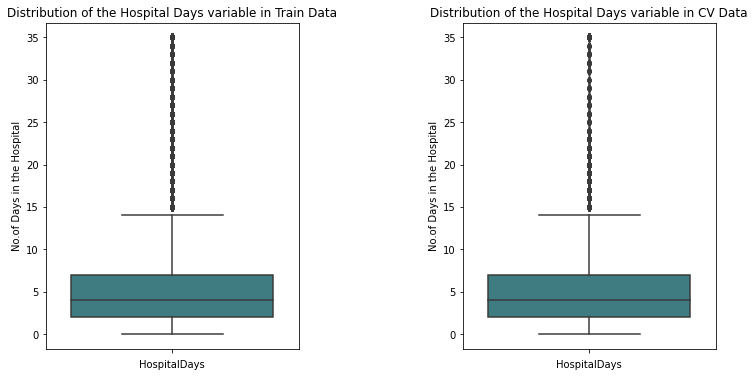

In [ ]:
fig= plt.figure(figsize=(12,6))
gs= GridSpec(1,2,figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

sns.boxplot(ax= ax1,y=train_fin['HospitalDays'],palette='crest')
sns.boxplot(ax= ax2,y=cv_fin['HospitalDays'],palette='crest')

ax1.set_xlabel("HospitalDays")
ax2.set_xlabel("HospitalDays")

ax1.set_ylabel("No.of Days in the Hospital")
ax2.set_ylabel("No.of Days in the Hospital")

ax1.set_title("Distribution of the Hospital Days variable in Train Data")
ax2.set_title("Distribution of the Hospital Days variable in CV Data")
plt.subplots_adjust(wspace=0.65)

plt.show()

##<font color='green'><b>**Observations**</b></font>
1. We see that in both the train and the cv datasets the median or the 50th percentile value is close to 5 while the 25th and the 75th percentile values are close to 3 and 7 respectively

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin_n1.pkl','wb') as tr_df:
    pickle.dump(train_fin,tr_df)
with open('/content/drive/MyDrive/Colab Notebooks/cv_fin_n1.pkl','wb') as cv_df:
    pickle.dump(cv_fin,cv_df)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin_n1.pkl','rb') as tr_df:
    train_fin1= pickle.load(tr_df)
with open('/content/drive/MyDrive/Colab Notebooks/cv_fin_n1.pkl','rb') as cv_df:
    cv_fin1= pickle.load(cv_df)

In [ ]:
print(train_fin1['HospitalDays'].isna().sum())
print(cv_fin1['HospitalDays'].isna().sum())

414039
103698


##<font color='blue'><b> Imputing the NA values in the HospitalDates variable with 0 values</b></font>

In [ ]:
train_fin1["HospitalDays"]=train_fin1["HospitalDays"].fillna(0)
cv_fin1["HospitalDays"]=cv_fin1["HospitalDays"].fillna(0)

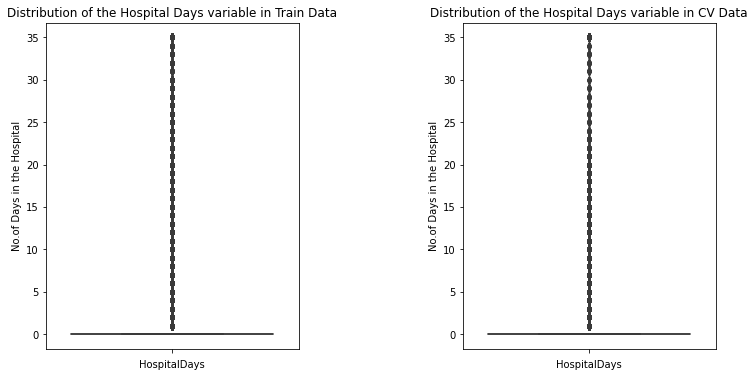

In [ ]:
fig= plt.figure(figsize=(12,6))
gs= GridSpec(1,2,figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

sns.boxplot(ax= ax1,y=train_fin1['HospitalDays'],palette='crest')
sns.boxplot(ax= ax2,y=cv_fin1['HospitalDays'],palette='crest')

ax1.set_xlabel("HospitalDays")
ax2.set_xlabel("HospitalDays")

ax1.set_ylabel("No.of Days in the Hospital")
ax2.set_ylabel("No.of Days in the Hospital")

ax1.set_title("Distribution of the Hospital Days variable in Train Data")
ax2.set_title("Distribution of the Hospital Days variable in CV Data")
plt.subplots_adjust(wspace=0.65)

plt.show()

##<font color='green'><b>**Observations**</b></font>

#### From the above two Box plots it is quite evident that the imputation of the NA values wiht 0 has drastically impacted the overall distribution of the variable in both the Train and CV datasets

###<font color='blue'><b> Hence Categorizing the variable as per weeks as it introduces ordinality in the feature as well as seperates out the inpatient and the outpatient data </b></font>

In [ ]:
for i in tqdm(range(len(train_fin1['HospitalDays']))):
    if train_fin1['HospitalDays'][i]==0.0:
        train_fin1["HospitalDays"][i]= 0
    if train_fin1["HospitalDays"][i]>0 and train_fin1["HospitalDays"][i]<=7:
        train_fin1["HospitalDays"][i]= 1
    elif train_fin1["HospitalDays"][i]>7 and train_fin1["HospitalDays"][i]<=14:
        train_fin1["HospitalDays"][i]= 2 
    elif train_fin1["HospitalDays"][i]>14 and train_fin1["HospitalDays"][i]<=21:
        train_fin1["HospitalDays"][i]= 3
    elif train_fin1["HospitalDays"][i]>21 and train_fin1["HospitalDays"][i]<=28:
        train_fin1["HospitalDays"][i]= 4
    elif train_fin1["HospitalDays"][i]>28:
        train_fin1["HospitalDays"][i]= 5

100%|██████████| 446568/446568 [00:53<00:00, 8359.45it/s]


In [ ]:
for i in tqdm(range(len(cv_fin1['HospitalDays']))):
    if cv_fin1['HospitalDays'][i]==0.0:
        cv_fin1["HospitalDays"][i]= 0
    if cv_fin1["HospitalDays"][i]>0 and cv_fin1["HospitalDays"][i]<=7:
        cv_fin1["HospitalDays"][i]= 1
    elif cv_fin1["HospitalDays"][i]>7 and cv_fin1["HospitalDays"][i]<=14:
        cv_fin1["HospitalDays"][i]= 2 
    elif cv_fin1["HospitalDays"][i]>14 and cv_fin1["HospitalDays"][i]<=21:
        cv_fin1["HospitalDays"][i]= 3
    elif cv_fin1["HospitalDays"][i]>21 and cv_fin1["HospitalDays"][i]<=28:
        cv_fin1["HospitalDays"][i]= 4
    elif cv_fin1["HospitalDays"][i]>28:
        cv_fin1["HospitalDays"][i]= 5

100%|██████████| 111643/111643 [00:13<00:00, 8430.96it/s]


In [ ]:
train_fin1= train_fin1.rename(columns={'HospitalDays':'HospitalWeeks'})
cv_fin1= cv_fin1.rename(columns={'HospitalDays':'HospitalWeeks'})

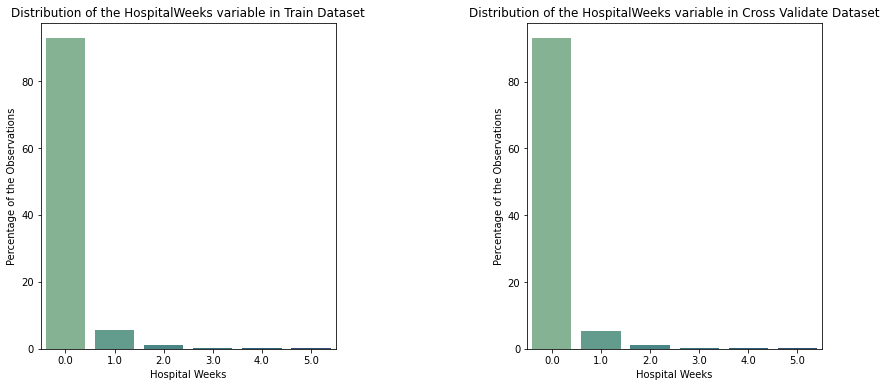

In [ ]:
fig=plt.figure(figsize=(14,6))
gs= GridSpec(1,2,figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

sns.barplot(ax=ax1, x= np.unique(train_fin1["HospitalWeeks"]),y= np.round((train_fin1["HospitalWeeks"].value_counts()/len(train_fin1["HospitalWeeks"]))*100,2),palette='crest')
sns.barplot(ax=ax2, x= np.unique(cv_fin1["HospitalWeeks"]),y= np.round((cv_fin1["HospitalWeeks"].value_counts()/len(cv_fin1["HospitalWeeks"]))*100,2),palette='crest')

ax1.set_xlabel("Hospital Weeks")
ax2.set_xlabel("Hospital Weeks")

ax1.set_ylabel("Percentage of the Observations")
ax2.set_ylabel("Percentage of the Observations")

ax1.set_title("Distribution of the HospitalWeeks variable in Train Dataset")
ax2.set_title("Distribution of the HospitalWeeks variable in Cross Validate Dataset")
plt.subplots_adjust(wspace=0.65)
plt.show()

##<font color='green'><b>**Observations**</b></font>
#### 1. As mentioned above 0 would be the highest as they are the imputed observations from the Inpatient and the Outpatient Datasests

#### 2. Other than 0, we see that the maximum days spent in the hospital is less than or equal to 1 week and the number of observations keep decreasing with more weeks

#### 3. This seems to be the general trend as there are fewer chronic illness cases in a hospital and most of the Inpatients are predominantly admitted for shoter duration of time

##<font color='blue'><b> Dropping the Admission Date and the Discharge Date columns from the dataset</b></font>

In [ ]:
train_fin1.drop(['AdmissionDt','DischargeDt'], axis=1, inplace=True)
cv_fin1.drop(['AdmissionDt','DischargeDt'], axis=1, inplace=True)

In [ ]:
na_col_tr=[]
na_perc_tr= np.round(((train_fin1.isna().sum())/train_fin1.shape[0])*100,2)
na_perc_df_tr= na_perc_tr.to_frame()
na_perc_df_tr.reset_index(inplace= True)
na_perc_df_tr.columns= ["col_name","na_percentage"]
for i in range(na_perc_df_tr.shape[0]):
    if na_perc_df_tr.iloc[i,1] == 0:
        na_col_tr.append(i)  

print(na_col_tr)

[0, 1, 2, 3, 4, 5, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [ ]:
na_perc_df_tr.drop(index=na_col_tr,inplace=True)
na_perc_df_tr.reset_index(drop=True,inplace=True)
print(na_perc_df_tr)

                col_name  na_percentage
0     AttendingPhysician           0.27
1     OperatingPhysician          79.50
2         OtherPhysician          64.24
3  ClmAdmitDiagnosisCode          73.88
4      DeductibleAmtPaid           0.16
5     DiagnosisGroupCode          92.72
6                    DOD          99.26


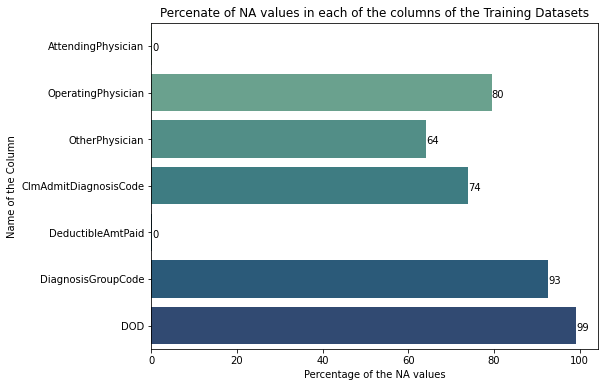

In [ ]:
plt.figure(figsize=(8,6))
ax= sns.barplot(y= na_perc_df_tr['col_name'],x= na_perc_df_tr['na_percentage'],palette='crest')

plt.ylabel("Name of the Column")
plt.xlabel("Percentage of the NA values")
plt.title("Percenate of NA values in each of the columns of the Training Datasets")

#Source: https://medium.com/@dey.mallika/transform-your-graphs-with-seaborn-ea4fa8e606a6
initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
    initialx+=1
plt.show()

##<font color='blue'><b>Looking at the distribution of the NA values in the Operating physician and Other physician columns of the Inpatients and the Outpatients datasets</b></font>

NA percent in OperatingPhysician col in Inpatient Data 41.12
NA percent in OtherPhysician col in Inpatient Data 88.41
****************************************************************************************************


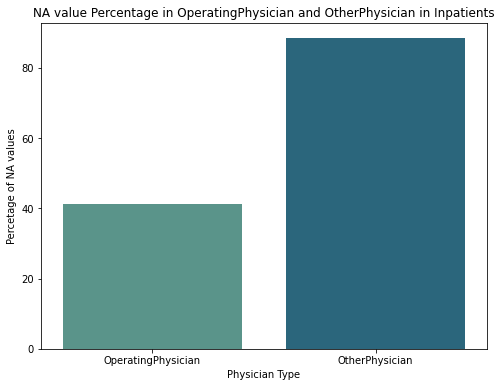

In [ ]:
in_opr_p=np.round((train_inpat['OperatingPhysician'].isna().sum()/len(train_inpat['OperatingPhysician']))*100,2)
in_ot_p= np.round((train_inpat['OtherPhysician'].isna().sum()/len(train_inpat['OtherPhysician']))*100,2)

print("NA percent in OperatingPhysician col in Inpatient Data",in_opr_p)
print("NA percent in OtherPhysician col in Inpatient Data",in_ot_p)
print("*"*100)

plt.figure(figsize=(8,6))
sns.barplot(x=["OperatingPhysician","OtherPhysician"],y=[in_opr_p,in_ot_p], palette='crest')
plt.xlabel("Physician Type")
plt.ylabel("Percetage of NA values")
plt.title("NA value Percentage in OperatingPhysician and OtherPhysician in Inpatients")
#plt.grid()
plt.show()

NA percent in OperatingPhysician col in Inpatient Data 82.5
NA percent in OtherPhysician col in Inpatient Data 62.33
****************************************************************************************************


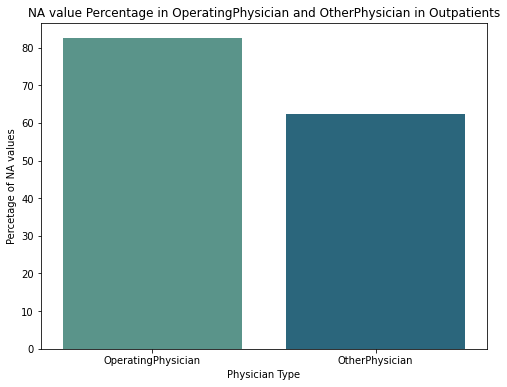

In [ ]:
out_opr_p=np.round((train_outpat['OperatingPhysician'].isna().sum()/len(train_outpat['OperatingPhysician']))*100,2)
out_ot_p= np.round((train_outpat['OtherPhysician'].isna().sum()/len(train_outpat['OtherPhysician']))*100,2)

print("NA percent in OperatingPhysician col in Inpatient Data",out_opr_p)
print("NA percent in OtherPhysician col in Inpatient Data",out_ot_p)

print("*"*100)
plt.figure(figsize=(8,6))
sns.barplot(x=["OperatingPhysician","OtherPhysician"],y=[out_opr_p,out_ot_p], palette='crest')
plt.xlabel("Physician Type")
plt.ylabel("Percetage of NA values")
plt.title("NA value Percentage in OperatingPhysician and OtherPhysician in Outpatients")
#plt.grid()
plt.show()

##<font color='green'><b>**Observations:**

#### 1. The above graphs are inline with the reality or practical situtation. NA values in Operating Physician and Other Physician datasets doesnt mean that the data is missing.

#### 2. As per my secondary research, Operating Physicians are involved in cases where a surgery or other complications are involved

#### 3. OtherPhysicians are involved in cases where the patient has co-morbidities

##<font color='green'><b>**Observations on Inpatient Dataset:**

#### 1. We have 41% NA values in Operating Physicians column. This means the 59% (100%-41%) of the Inpatients likely needed a surgery or had other complication where as 41% didnt have any complications or didnt need surgery 

#### 2. We have 88% NA values in Other Physicians column. This means the 12% (100%-88%) of the Inpatients had co-morbidities where as 12% didnt have co-morbidities 

##<font color='green'><b>**Observations on Outpatient Dataset:**

#### 1. We have 82% NA values in Operating Physicians column. Outpatients do not usually go through surgeries or other complicated procedures in a day 

#### 2. We have 62% NA values in Other Physicians column.Outpatients do not usually consult other physicians very often.

##<font color='blue'><b>Imputing the Attending Physician with Mode or MostFrequent strategy using SimpleImpute</b></font>

In [ ]:
cat_imp= SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')
train_fin1["AttendingPhysician"]= cat_imp.fit_transform(train_fin1['AttendingPhysician'].values.reshape(-1,1))[:,0]

In [ ]:
train_fin1["AttendingPhysician"].isna().sum()

0

##<font color='red'><b>**Feature Engineering**

#### A new column has been created to capture the nature of illness of the patient.This column will be categorical and will have the below categories:

#### 1.Simple 
#### 2.Operating
#### 3.comorbid
#### 4.Operating&comorbid

In [ ]:
train_fin1["IllnessNature"]= np.zeros(len(train_fin1["AttendingPhysician"]))
cv_fin1["IllnessNature"]= np.zeros(len(cv_fin1["AttendingPhysician"]))

In [ ]:
for i in tqdm(range(len(train_fin1["AttendingPhysician"]))):
    if pd.isnull(train_fin1["OperatingPhysician"][i])==True and pd.isnull(train_fin1["OtherPhysician"][i])==True:
        train_fin1["IllnessNature"][i]= "simple"
    elif pd.isnull(train_fin1["OperatingPhysician"][i])==True and pd.isnull(train_fin1["OtherPhysician"][i])==False:
        train_fin1["IllnessNature"][i]= "operating"
    elif pd.isnull(train_fin1["OperatingPhysician"][i])==False and pd.isnull(train_fin1["OtherPhysician"][i])==True:
        train_fin1["IllnessNature"][i]= "comorbid"
    elif pd.isnull(train_fin1["OperatingPhysician"][i])==False and pd.isnull(train_fin1["OtherPhysician"][i])==False:
        train_fin1["IllnessNature"][i]= "operating&comorbid"

100%|██████████| 446568/446568 [28:45<00:00, 258.81it/s]


In [ ]:
for i in tqdm(range(len(cv_fin1["AttendingPhysician"]))):
    if pd.isnull(cv_fin1["OperatingPhysician"][i])==True and pd.isnull(cv_fin1["OtherPhysician"][i])==True:
        cv_fin1["IllnessNature"][i]= "simple"
    elif pd.isnull(cv_fin1["OperatingPhysician"][i])==True and pd.isnull(cv_fin1["OtherPhysician"][i])==False:
        cv_fin1["IllnessNature"][i]= "operating"
    elif pd.isnull(cv_fin1["OperatingPhysician"][i])==False and pd.isnull(cv_fin1["OtherPhysician"][i])==True:
        cv_fin1["IllnessNature"][i]= "comorbid"
    elif pd.isnull(cv_fin1["OperatingPhysician"][i])==False and pd.isnull(cv_fin1["OtherPhysician"][i])==False:
        cv_fin1["IllnessNature"][i]= "operating&comorbid"

100%|██████████| 111643/111643 [01:11<00:00, 1567.18it/s]


In [ ]:
print(np.unique(train_fin1["IllnessNature"]))
print(np.unique(cv_fin1["IllnessNature"]))

['comorbid' 'operating' 'operating&comorbid' 'simple']
['comorbid' 'operating' 'operating&comorbid' 'simple']


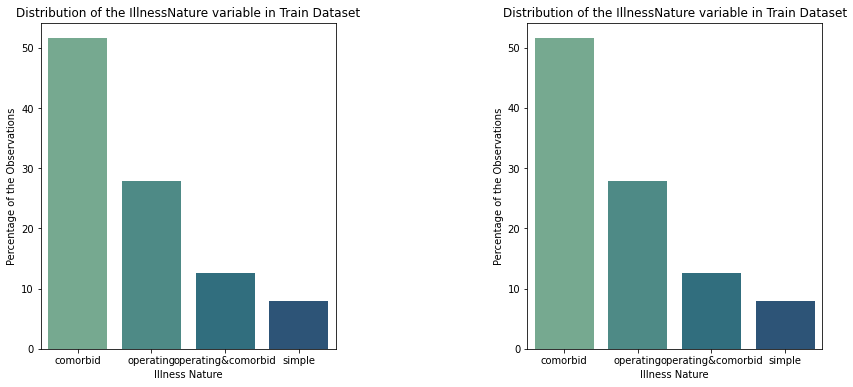

In [ ]:
fig=plt.figure(figsize=(14,6))
gs= GridSpec(1,2,figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

sns.barplot(ax=ax1, x= np.unique(train_fin1["IllnessNature"]),y= np.round((train_fin1["IllnessNature"].value_counts()/len(train_fin1["IllnessNature"]))*100,2),palette='crest')
sns.barplot(ax=ax2, x= np.unique(cv_fin1["IllnessNature"]),y= np.round((cv_fin1["IllnessNature"].value_counts()/len(cv_fin1["IllnessNature"]))*100,2),palette='crest')

ax1.set_xlabel("Illness Nature")
ax2.set_xlabel("Illness Nature")

ax1.set_ylabel("Percentage of the Observations")
ax2.set_ylabel("Percentage of the Observations")

ax1.set_title("Distribution of the IllnessNature variable in Train Dataset")
ax2.set_title("Distribution of the IllnessNature variable in Train Dataset")
plt.subplots_adjust(wspace=0.65)
plt.show()

##<font color='green'><b>**Observations**</b></font>
1. Comorbid condition or the illness nature has the highest percentage of the observations in the overall dataset followed by the Operating illness nature.

2. Simple illness nature has the lowest percetage of the observations of the total dataset.

In [ ]:
train_fin1.drop(['OperatingPhysician','OtherPhysician'], axis=1,inplace=True)
cv_fin1.drop(['OperatingPhysician','OtherPhysician'], axis=1,inplace=True)

In [ ]:
train_fin2.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,#_Procedures,#_DiagnosisCodes,HospitalWeeks,IllnessNature,ClaimWeeks,State_Yes,State_No,PotentialFraud,County_Yes,County_No,DGC_Yes,DGC_No,BID_Yes,BID_No,CID_Yes,CID_No,Pvr_Yes,Pvr_No,Ap_Yes,Ap_No,age,CADC_Yes,CADC_No
0,90,0.0,G2,R1,0,1,1,0,1,1,0,0,0,0,1,1,5030,1068,1090,560,0.0,1.0,0.0,operating,0,0.452303,0.547697,Yes,0.450456,0.549544,0.457119,0.542881,0.333333,0.666667,0.909091,0.090909,0.472603,0.527397,0.259259,0.740741,71.550685,0.465483,0.534517
1,5000,1068.0,G1,R1,1,0,1,0,1,1,1,0,0,1,1,1,5000,1068,70,0,0.0,9.0,1.0,simple,1,0.454039,0.545961,NaN,0.412322,0.587678,0.571429,0.428571,0.500000,0.500000,0.500000,0.500000,0.397590,0.602410,0.090909,0.909091,73.383562,0.482759,0.517241
2,400,0.0,G1,R1,0,1,0,1,1,1,1,0,0,1,0,0,0,0,3870,540,0.0,3.0,0.0,simple,3,0.453210,0.546790,Yes,0.450461,0.549539,0.457119,0.542881,0.272727,0.727273,0.909091,0.090909,0.462111,0.537889,0.318182,0.681818,79.054795,0.456727,0.543273
3,30,0.0,G2,R2,0,1,1,0,1,1,0,1,1,0,1,1,3000,1068,1680,140,0.0,5.0,0.0,operating,0,0.452382,0.547618,Yes,0.440764,0.559236,0.457119,0.542881,0.571429,0.428571,0.909091,0.090909,0.428762,0.571238,0.518519,0.481481,53.284932,0.456727,0.543273
4,2000,1068.0,G2,R1,0,0,0,1,1,1,1,1,0,1,1,1,2000,1068,1160,650,1.0,9.0,1.0,comorbid,1,0.454316,0.545684,Yes,0.455049,0.544951,0.437500,0.562500,0.400000,0.600000,0.909091,0.090909,0.453608,0.546392,0.447368,0.552632,82.224658,0.372093,0.627907


##<font color='red'><b>**Feature Engineering**</b></font>

#### Extracting the number of days from the claim start date and the claim end dates by taking a difference

#### Converting the number of days during which the claim was in process into number of weeks

In [ ]:
train_fin1["ClaimDays"]= (pd.to_datetime(train_fin1['ClaimEndDt']) - pd.to_datetime(train_fin1['ClaimStartDt'])).dt.days
cv_fin1["ClaimDays"]= (pd.to_datetime(cv_fin1['ClaimEndDt']) - pd.to_datetime(cv_fin1['ClaimStartDt'])).dt.days

In [ ]:
train_fin1.drop(['ClaimEndDt','ClaimStartDt'],axis=1, inplace=True)
cv_fin1.drop(['ClaimEndDt','ClaimStartDt'],axis=1, inplace=True)

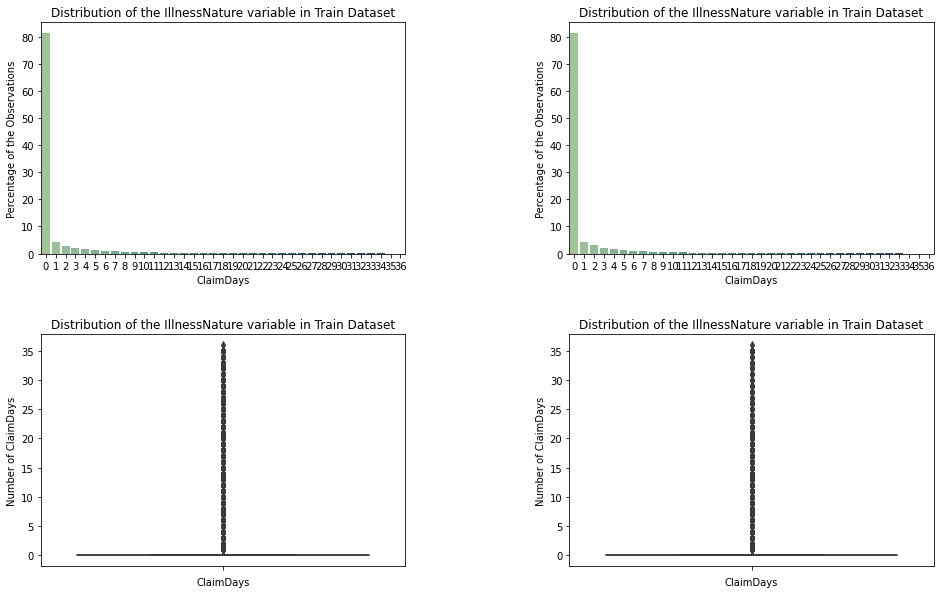

In [ ]:
fig=plt.figure(figsize=(16,10))
gs= GridSpec(2,2,figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,0])
ax4= fig.add_subplot(gs[1,1])

sns.barplot(ax=ax1, x= np.unique(train_fin1["ClaimDays"]),y= np.round((train_fin1["ClaimDays"].value_counts()/len(train_fin1["ClaimDays"]))*100,2),palette='crest')
sns.barplot(ax=ax2, x= np.unique(cv_fin1["ClaimDays"]),y= np.round((cv_fin1["ClaimDays"].value_counts()/len(cv_fin1["ClaimDays"]))*100,2),palette='crest')
sns.boxplot(ax=ax3, y= train_fin1["ClaimDays"],palette='crest')
sns.boxplot(ax=ax4, y= cv_fin1["ClaimDays"],palette='crest')

ax1.set_xlabel("ClaimDays")
ax2.set_xlabel("ClaimDays")
ax3.set_xlabel("ClaimDays")
ax4.set_xlabel("ClaimDays")

ax1.set_ylabel("Percentage of the Observations")
ax2.set_ylabel("Percentage of the Observations")
ax3.set_ylabel("Number of ClaimDays")
ax4.set_ylabel("Number of ClaimDays")

ax1.set_title("Distribution of the IllnessNature variable in Train Dataset")
ax2.set_title("Distribution of the IllnessNature variable in Train Dataset")
ax3.set_title("Distribution of the IllnessNature variable in Train Dataset")
ax4.set_title("Distribution of the IllnessNature variable in Train Dataset")

plt.subplots_adjust(wspace=0.45)
plt.subplots_adjust(hspace=0.35)
plt.show()

##<font color='green'><b>**Observations**</b></font>
#### 1. We see that more than 80% of the claim days are zero and close to 95% of the claim days are less than 7 days. 

#### 2. Keeping the varibale datatype as floating point value will skew the mean and other distribution related parameters

#### 3. Converting the varibale into a Categorical Variable(Ordinal)

In [ ]:
for i in tqdm(range(len(train_fin1['ClaimDays']))):
    if train_fin1['ClaimDays'][i]==0:
        train_fin1['ClaimDays'][i]=0 
    elif train_fin1['ClaimDays'][i]>0 and train_fin1['ClaimDays'][i]<=7:
        train_fin1['ClaimDays'][i]= 1
    elif train_fin1['ClaimDays'][i]>7 and train_fin1['ClaimDays'][i]<=14:
        train_fin1['ClaimDays'][i]= 2
    elif train_fin1['ClaimDays'][i]> 14 and train_fin1['ClaimDays'][i]<=21:
        train_fin1['ClaimDays'][i]= 3
    elif train_fin1['ClaimDays'][i]>21 and train_fin1['ClaimDays'][i]<=28:
        train_fin1['ClaimDays'][i]= 4
    elif train_fin1['ClaimDays'][i]>28 and train_fin1['ClaimDays'][i]<=35:
        train_fin1['ClaimDays'][i]=5
    elif train_fin1['ClaimDays'][i]>35:
        train_fin1['ClaimDays'][i]=6

100%|██████████| 446568/446568 [00:41<00:00, 10887.56it/s]


In [ ]:
for i in tqdm(range(len(cv_fin1['ClaimDays']))):
    if cv_fin1['ClaimDays'][i]==0:
        cv_fin1['ClaimDays'][i]=0 
    elif cv_fin1['ClaimDays'][i]>0 and cv_fin1['ClaimDays'][i]<=7:
        cv_fin1['ClaimDays'][i]= 1
    elif cv_fin1['ClaimDays'][i]>7 and cv_fin1['ClaimDays'][i]<=14:
        cv_fin1['ClaimDays'][i]= 2
    elif cv_fin1['ClaimDays'][i]> 14 and cv_fin1['ClaimDays'][i]<=21:
        cv_fin1['ClaimDays'][i]= 3
    elif cv_fin1['ClaimDays'][i]>21 and cv_fin1['ClaimDays'][i]<=28:
        cv_fin1['ClaimDays'][i]= 4
    elif cv_fin1['ClaimDays'][i]>28 and cv_fin1['ClaimDays'][i]<=35:
        cv_fin1['ClaimDays'][i]=5
    elif cv_fin1['ClaimDays'][i]>35:
        cv_fin1['ClaimDays'][i]=6

100%|██████████| 111643/111643 [00:10<00:00, 10793.91it/s]


In [ ]:
train_fin1= train_fin1.rename(columns={'ClaimDays':'ClaimWeeks'})
cv_fin1= cv_fin1.rename(columns={'ClaimDays':'ClaimWeeks'})

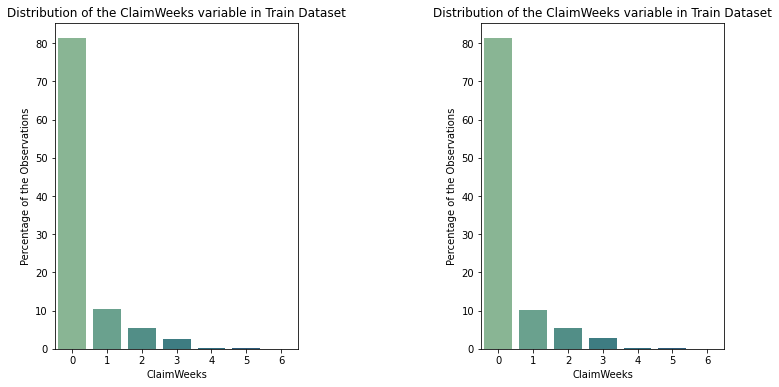

In [ ]:
fig=plt.figure(figsize=(12,6))
gs= GridSpec(1,2,figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

sns.barplot(ax=ax1, x= np.unique(train_fin1["ClaimWeeks"]),y= np.round((train_fin1["ClaimWeeks"].value_counts()/len(train_fin1["ClaimWeeks"]))*100,2),palette='crest')
sns.barplot(ax=ax2, x= np.unique(cv_fin1["ClaimWeeks"]),y= np.round((cv_fin1["ClaimWeeks"].value_counts()/len(cv_fin1["ClaimWeeks"]))*100,2),palette='crest')

ax1.set_xlabel("ClaimWeeks")
ax2.set_xlabel("ClaimWeeks")

ax1.set_ylabel("Percentage of the Observations")
ax2.set_ylabel("Percentage of the Observations")

ax1.set_title("Distribution of the ClaimWeeks variable in Train Dataset")
ax2.set_title("Distribution of the ClaimWeeks variable in Train Dataset")

plt.subplots_adjust(wspace=0.75)
plt.show()

##<font color='green'><b>**Observations**</b></font>
1. From the above graph we see that about 80% of the claims get settled instantly where the claimweeks are less than 0 weeks

2. We observe that as a total about 15% claims are settled between 0 to 3 weeks. 

3. The reason behind the skewness towards 0 could be that the majority of the dataset belongs to the outpatient data and average claims settlement for the inpatient data is close to 1 week.

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin_n2.pkl','wb') as tr_df:
    pickle.dump(train_fin1,tr_df)
with open('/content/drive/MyDrive/Colab Notebooks/cv_fin_n2.pkl','wb') as cv_df:
    pickle.dump(cv_fin1,cv_df)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin_n2.pkl','rb') as tr_df:
    train_fin2= pickle.load(tr_df)
with open('/content/drive/MyDrive/Colab Notebooks/cv_fin_n2.pkl','rb') as cv_df:
    cv_fin2= pickle.load(cv_df)

###<font color='blue'><b> Looking at the NA value distribtution of the DiagnosisGroupCode variable</b></font>

In [ ]:
print("Percentage of NA values in Inpateint Data: ",(train_inpat['DiagnosisGroupCode'].isna().sum()/len(train_inpat['DiagnosisGroupCode']))*100)
print("Percentage of NA values in Merged Data: ",np.round((train_fin2['DiagnosisGroupCode'].isna().sum()/len(train_fin2['DiagnosisGroupCode']))*100))
print("Ratio of Outpatient data to Merged Dataset",np.round((train_outpat.shape[0]/(train_fin2.shape[0]+cv_fin2.shape[0]))*100))

Percentage of NA values in Inpateint Data:  0.0
Percentage of NA values in Merged Data:  93.0
Ratio of Outpatient data to Merged Dataset 93.0


##<font color='green'><b>**Observations**</b>,</font>

#### 1. From the above we see that there are no NA values in the Inpatient data and the variable "DiagnosisGroupCode" is missing in the Outpatient Dataset.

#### 2. https://hmsa.com/portal/provider/zav_pel.fh.DIA.650.htm: clearly states that a DiagnosisGroupCode is just for the Inpatient Data and not for the outpatient data. Hence NA were introduced during the merger of the Dataset

#### 3 Hence filling the NA as new category with a value of 0

In [ ]:
train_fin2['DiagnosisGroupCode']= train_fin2['DiagnosisGroupCode'].fillna(0)
cv_fin2['DiagnosisGroupCode']= cv_fin2['DiagnosisGroupCode'].fillna(0)

In [ ]:
train_fin2['DiagnosisGroupCode']= train_fin2['DiagnosisGroupCode'].astype('str')
train_fin2['DiagnosisGroupCode']= train_fin2['DiagnosisGroupCode'].astype('str')

train_fin2['DiagnosisGroupCode'].describe()
#sns.distplot(train_fin3['DiagnosisGroupCode'].value_counts())

count     558211
unique       737
top            0
freq      517737
Name: DiagnosisGroupCode, dtype: object

In [ ]:
print("Percentage of NA values in Inpateint Data: ",(train_inpat['ClmAdmitDiagnosisCode'].isna().sum()/len(train_inpat['ClmAdmitDiagnosisCode']))*100)
print("Percentage of NA values in Outpateint Data: ",np.round((train_outpat['ClmAdmitDiagnosisCode'].isna().sum()/len(train_outpat['ClmAdmitDiagnosisCode']))*100))

Percentage of NA values in Inpateint Data:  0.0
Percentage of NA values in Outpateint Data:  80.0


##<font color='green'><b>**Observations**</b></font>
1. Majority of the categorical columns have a more than 50-100 categories in each of the columns

2. Adopting a one-hot encoding to convert the categorical columns into numerical columns could lead to creation of a lot of columns leading to Curse of Dimensionality

3. Using response coding in order to convert categorical columns to numerical ones.

**Response Coding**: Calculating the proabilities of each of the categories in a column. Probability is calculated as follows

P(x=c1/y='yes') which is Probability of category in column X, given the Y varibale belongs to class 'Yes' and class 'No'

P(x=c1/y='yes')= (Number of Occurences of C1 where Y belongs to 'yes' class) divided by (Number of Occurences of where Y='yes' + Number of Occurences of where Y='No') 

##<font color='red'><b>Feature Engineering</b></font>
#### Response Coding of the DiagnosisGroupCode, State,County, BeneID,ClaimID,Provider,AttendingPhysician

In [ ]:
train_fin2['PotentialFraud']= train_y
cv_fin2['PotentialFraud']= cv_y

In [ ]:
def response_coding(tr_data,cv_data,col,y):
    tr_yes_list=[]
    tr_no_list=[]
    cv_yes_list=[]
    cv_no_list=[]
    
    val_dict= dict(tr_data.groupby([col])[y].value_counts())
    
    for i in range(len(tr_data[col])):
        t_y= val_dict.get((tr_data[col][i],'Yes'),0.1)
        t_n= val_dict.get((tr_data[col][i],'No'),0.1)
        tr_yes_list.append(t_y/(t_y+t_n))
        tr_no_list.append(t_n/(t_y+t_n))

    for j in range(len(cv_data[col])):
        c_y= val_dict.get((cv_data[col][j],'Yes'),0.1)
        c_n= val_dict.get((cv_data[col][j],'No'),0.1)
        cv_yes_list.append(c_y/(c_y+c_n))
        cv_no_list.append(c_n/(c_y+c_n))  
    
    return tr_yes_list,tr_no_list,cv_yes_list,cv_no_list,val_dict

In [ ]:
train_fin2['State_Yes']= np.zeros(len(train_fin2['State']))
train_fin2['State_No']= np.zeros(len(train_fin2['State']))

cv_fin2['State_Yes']= np.zeros(len(cv_fin2['State']))
cv_fin2['State_No']= np.zeros(len(cv_fin2['State']))

train_fin2['State_Yes'],train_fin2['State_No'],cv_fin2['State_Yes'],cv_fin2['State_No'],state_dict= response_coding(train_fin2,cv_fin2,'State','PotentialFraud')
print(state_dict)

In [ ]:
train_fin2['County_Yes']= np.zeros(len(train_fin2['County']))
train_fin2['County_No']= np.zeros(len(train_fin2['County']))

cv_fin2['County_Yes']= np.zeros(len(cv_fin2['County']))
cv_fin2['County_No']= np.zeros(len(cv_fin2['County']))

train_fin2['County_Yes'],train_fin2['County_No'],cv_fin2['County_Yes'],cv_fin2['County_No'],county_dict= response_coding(train_fin2,cv_fin2,'County','PotentialFraud')
print(county_dict)

In [ ]:
train_fin2['DGC_Yes']= np.zeros(len(train_fin2['DiagnosisGroupCode']))
train_fin2['DGC_No']= np.zeros(len(train_fin2['DiagnosisGroupCode']))

cv_fin2['DGC_Yes']= np.zeros(len(cv_fin2['DiagnosisGroupCode']))
cv_fin2['DGC_No']= np.zeros(len(cv_fin2['DiagnosisGroupCode']))

train_fin2['DGC_Yes'],train_fin2['DGC_No'],cv_fin2['DGC_Yes'],cv_fin2['DGC_No'],dgc_dict= response_coding(train_fin2,cv_fin2,'DiagnosisGroupCode','PotentialFraud')
print(dgc_dict)

In [ ]:
train_fin2['BID_Yes']= np.zeros(len(train_fin2['BeneID']))
train_fin2['BID_No']= np.zeros(len(train_fin2['BeneID']))

train_fin2['BID_Yes']= np.zeros(len(train_fin2['BeneID']))
train_fin2['BID_No']= np.zeros(len(train_fin2['BeneID']))

train_fin2['BID_Yes'],train_fin2['BID_No'],cv_fin2['BID_Yes'],cv_fin2['BID_No'],bid_dict= response_coding(train_fin2,cv_fin2,'BeneID','PotentialFraud')

In [ ]:
train_fin2['CID_Yes']= np.zeros(len(train_fin2['ClaimID']))
train_fin2['CID_No']= np.zeros(len(train_fin2['ClaimID']))

cv_fin2['CID_Yes']= np.zeros(len(cv_fin2['ClaimID']))
cv_fin2['CID_No']= np.zeros(len(cv_fin2['ClaimID']))

train_fin2['CID_Yes'],train_fin2['CID_No'],cv_fin2['CID_Yes'],cv_fin2['CID_No'],cid_dict= response_coding(train_fin2,cv_fin2,'ClaimID','PotentialFraud')

In [ ]:
train_fin2['Pvr_Yes']= np.zeros(len(train_fin2['Provider']))
train_fin2['Pvr_No']= np.zeros(len(train_fin2['Provider']))

cv_fin2['Pvr_Yes']= np.zeros(len(cv_fin2['Provider']))
cv_fin2['Pvr_No']= np.zeros(len(cv_fin2['Provider']))

train_fin2['Pvr_Yes'],train_fin2['Pvr_No'],cv_fin2['Pvr_Yes'],cv_fin2['Pvr_No'],pvr_dict= response_coding(train_fin2,cv_fin2,'Provider','PotentialFraud')

In [ ]:
train_fin2['Ap_Yes']= np.zeros(len(train_fin2['AttendingPhysician']))
train_fin2['Ap_No']= np.zeros(len(train_fin2['AttendingPhysician']))

cv_fin2['Ap_Yes']= np.zeros(len(cv_fin2['AttendingPhysician']))
cv_fin2['Ap_No']= np.zeros(len(cv_fin2['AttendingPhysician']))


train_fin2['Ap_Yes'],train_fin2['Ap_No'],cv_fin2['Ap_Yes'],cv_fin2['Ap_No'],ap_dict= response_coding(train_fin2,cv_fin2,'AttendingPhysician','PotentialFraud')

In [ ]:
train_fin2.drop(['State','County','DiagnosisGroupCode','BeneID','ClaimID','Provider','AttendingPhysician'], axis=1, inplace=True)
cv_fin2.drop(['State','County','DiagnosisGroupCode','BeneID','ClaimID','Provider','AttendingPhysician'], axis=1, inplace=True)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin_n3.pkl','wb') as tr_df:
    pickle.dump(train_fin2,tr_df)
with open('/content/drive/MyDrive/Colab Notebooks/cv_fin_n3.pkl','wb') as cv_df:
    pickle.dump(cv_fin2,cv_df)

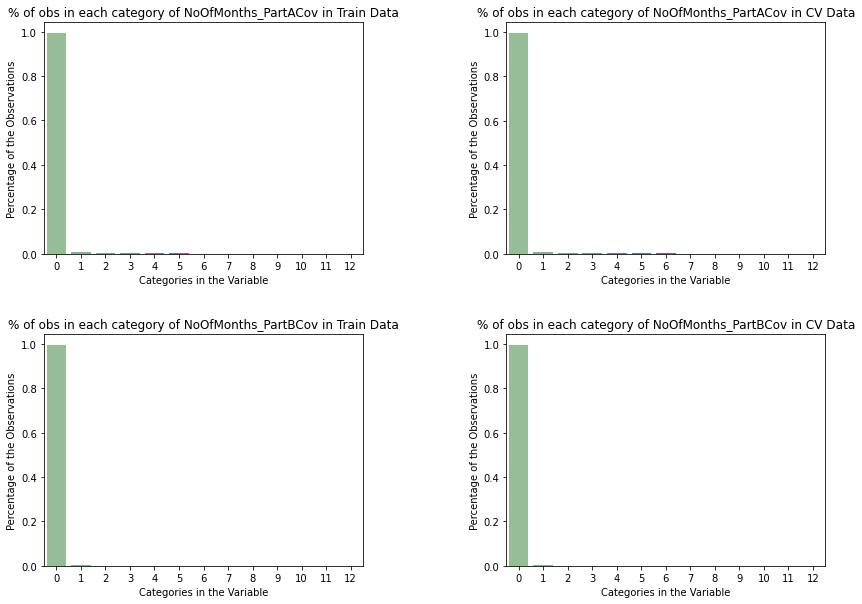

In [ ]:
fig= plt.figure(figsize=(14,10))
gs= GridSpec(2,2,figure= fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,0])
ax4= fig.add_subplot(gs[1,1])

sns.barplot(ax=ax1,x= np.unique(train_fin2['NoOfMonths_PartACov']),y=train_fin2['NoOfMonths_PartACov'].value_counts()/len(train_fin2['NoOfMonths_PartACov']),palette='crest')
sns.barplot(ax=ax2,x= np.unique(cv_fin2['NoOfMonths_PartACov']),y=cv_fin2['NoOfMonths_PartACov'].value_counts()/len(cv_fin2['NoOfMonths_PartACov']),palette='crest')
sns.barplot(ax=ax3,x= np.unique(train_fin2['NoOfMonths_PartBCov']),y=train_fin2['NoOfMonths_PartBCov'].value_counts()/len(train_fin2['NoOfMonths_PartBCov']),palette='crest')
sns.barplot(ax=ax4,x= np.unique(cv_fin2['NoOfMonths_PartBCov']),y=cv_fin2['NoOfMonths_PartBCov'].value_counts()/len(cv_fin2['NoOfMonths_PartBCov']),palette='crest')

ax1.set_xlabel('Categories in the Variable')
ax2.set_xlabel('Categories in the Variable')
ax3.set_xlabel('Categories in the Variable')
ax4.set_xlabel('Categories in the Variable')

ax1.set_ylabel('Percentage of the Observations')
ax2.set_ylabel('Percentage of the Observations')
ax3.set_ylabel('Percentage of the Observations')
ax4.set_ylabel('Percentage of the Observations')

ax1.set_title('% of obs in each category of NoOfMonths_PartACov in Train Data')
ax2.set_title('% of obs in each category of NoOfMonths_PartACov in CV Data')
ax3.set_title('% of obs in each category of NoOfMonths_PartBCov in Train Data')
ax4.set_title('% of obs in each category of NoOfMonths_PartBCov in CV Data')

plt.subplots_adjust(wspace=0.45)
plt.subplots_adjust(hspace=0.35)

plt.show()

##<font color='green'><b> **Observations** </b></font>

1. From the above graphs we see that close to 99% of the observations have 0 months in both PartACoverage and PartBCoverage in both the train and cv datasets

2. Since most of the column belongs to same category or has a value of 1 month, the variance in the column is close to 0.

3. Due to 0 varinace the contribution of the PartACoverage and PartBCoverage variables to the overall classification of the obsevrations in the PotentialFraud column

####<font color='blue'><b> Dropping the NoOfMonths PartACov and the NoofMonths PartBCov variables as they are contributing to the classification task.</b></font>

In [ ]:
train_fin2.drop(['NoOfMonths_PartACov','NoOfMonths_PartBCov'],axis=1, inplace= True)
cv_fin2.drop(['NoOfMonths_PartACov','NoOfMonths_PartBCov'],axis=1, inplace= True)

In [ ]:
train_fin2['DOB']= pd.to_datetime(train_fin2['DOB'])
train_fin2['DOD']= pd.to_datetime(train_fin2['DOD'])

cv_fin2['DOB']= pd.to_datetime(cv_fin2['DOB'])
cv_fin2['DOD']= pd.to_datetime(cv_fin2['DOD'])

##<font color='red'><b> **Feature Engineering** </b></font>
Calculating the age of each of the patients as follows:

1.In cases where the Date of Death (DOD) is available, Age= DOD-DOB in years

2.In cases where the Date of Death (DOD) is not available, Age= Max(DOD)-DOB in years


We use Max(DOD) in case2 to see the year upto which the data has been collected to calculate the patients age at that point of time


In [ ]:
print("The NA percentage in the D.O.B variable: ",train_fin2['DOB'].isna().sum()/len(train_fin2['DOB']))
print("The NA percentage in the D.O.D variable: ",train_fin2['DOD'].isna().sum()/len(train_fin2['DOD']))

print("The NA percentage in the D.O.B variable: ",cv_fin2['DOB'].isna().sum()/len(cv_fin2['DOB']))
print("The NA percentage in the D.O.D variable: ",cv_fin2['DOD'].isna().sum()/len(cv_fin2['DOD']))

The NA percentage in the D.O.B variable:  0.0
The NA percentage in the D.O.D variable:  0.992601350746135
The NA percentage in the D.O.B variable:  0.0
The NA percentage in the D.O.D variable:  0.9925924598944851


In [ ]:
train_fin2['age']= np.zeros(len(train_fin2['DOB']))

a_max_tr= train_fin2['DOD'].max()

for i in range(len(train_fin2['DOB'])):
    if pd.isnull(train_fin2['DOD'][i])== True:
        train_fin2['age'][i]= (a_max_tr-train_fin2['DOB'][i])/timedelta(days=365)
    else:
        train_fin2['age'][i]= (train_fin2['DOD'][i]-train_fin2['DOB'][i])/timedelta(days=365)

In [ ]:
cv_fin2['age']= np.zeros(len(cv_fin2['DOB']))

a_max_cv= cv_fin2['DOD'].max()

for i in range(len(cv_fin2['DOB'])):
    if pd.isnull(cv_fin2['DOD'][i])== True:
        cv_fin2['age'][i]= (a_max_cv-train_fin2['DOB'][i])/timedelta(days=365)
    else:
        cv_fin2['age'][i]= (cv_fin2['DOD'][i]-cv_fin2['DOB'][i])/timedelta(days=365)

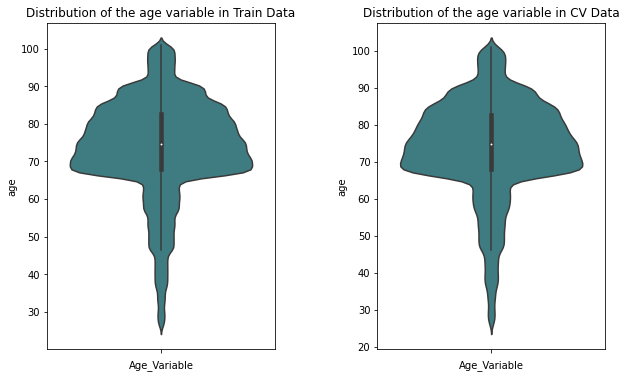

In [11]:
fig= plt.figure(figsize=(10,6))
gs= GridSpec(1,2,figure=fig)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

sns.violinplot(y=train_fin3['age'],ax= ax1,palette='crest')
sns.violinplot(y=cv_fin3['age'],ax= ax2,palette='crest')

ax1.set_xlabel('Age_Variable')
ax2.set_xlabel('Age_Variable')

ax1.set_title('Distribution of the age variable in Train Data')
ax2.set_title('Distribution of the age variable in CV Data')

plt.subplots_adjust(wspace=0.45)
plt.show()

##<font color='green'><b>**Observations**</b></font>
1. From the above graphs we see that a vast majority of the patients in the dataset has a age between 65 and 90.

2. The 50th percentile of the age variable in the train and c datasets seems to be close to 75 years and the 25th and the 75th percentile are at 67 and 82 years resepctively confirming point 1

3. The left/bottom tail of the distribution seems to skewed towards more younger ages raning between early 20s to early 60s with the distrbution broadening up with increase in age

4. This is in agreement with the general trend as younger ppl tend to visit the hospital fewer number times than the older population

5. The increase in density could also be due to the fact that older population wiht age between 60 and 80 tend to visit the hospital as a outpatient for their regular check ups or regular visits to theri doctors

####<font color='blue'><b>Dropping the DOB and DOD columns from the dataset as the information from both the variables has been cpatured in the Age variable</b></font>

In [ ]:
train_fin2.drop(['DOB','DOD'], axis=1,inplace=True)
cv_fin2.drop(['DOB','DOD'], axis=1,inplace=True)

In [ ]:
print(np.round((train_inpat['ClmAdmitDiagnosisCode'].isna().sum()/len(train_inpat['ClmAdmitDiagnosisCode']))*100,2),'%')
print(np.round((train_outpat['ClmAdmitDiagnosisCode'].isna().sum()/len(train_outpat['ClmAdmitDiagnosisCode']))*100,2),'%')
print(np.round((train_fin5['ClmAdmitDiagnosisCode'].isna().sum()/len(train_fin5['ClmAdmitDiagnosisCode']))*100,2),'%')

0.0 %
79.64 %
73.86 %


####<font color='blue'><b>Imputing the ClaimAditDiagosis variable with 0</b></font>

In [ ]:
train_fin2['ClmAdmitDiagnosisCode']= train_fin2['ClmAdmitDiagnosisCode'].fillna(0)
cv_fin2['ClmAdmitDiagnosisCode']= cv_fin2['ClmAdmitDiagnosisCode'].fillna(0)

####<font color='blue'><b>Response Encoding of the ClaimsAdmitDiagnosis variable due to the presence of large number of categories in the variable</b></font>

In [ ]:
train_fin2['CADC_Yes']= np.zeros(len(train_fin2['ClmAdmitDiagnosisCode']))
train_fin2['CADC_No']= np.zeros(len(train_fin2['ClmAdmitDiagnosisCode']))
cv_fin2['CADC_Yes']= np.zeros(len(cv_fin2['ClmAdmitDiagnosisCode']))
cv_fin2['CADC_No']= np.zeros(len(cv_fin2['ClmAdmitDiagnosisCode']))

train_fin2['CADC_Yes'],train_fin2['CADC_No'],cv_fin2['CADC_Yes'],cv_fin2['CADC_No'],cadc_dict= response_coding(train_fin2,cv_fin2,'ClmAdmitDiagnosisCode','PotentialFraud')

####<font color='blue'><b>Dropping the ClmAdmitDiagnosisCode from the dataset</b></font>

In [ ]:
train_fin2.drop(['ClmAdmitDiagnosisCode'], axis=1, inplace=True)
cv_fin2.drop(['ClmAdmitDiagnosisCode'], axis=1, inplace=True)

####<font color='blue'><b>Replacing the Y and 0 in the RenalDiseaseIdicator varibale with 1 and 0</b></font>

In [ ]:
train_fin2['RenalDiseaseIndicator']= train_fin2['RenalDiseaseIndicator'].map({'Y':1,'0':0})
cv_fin2['RenalDiseaseIndicator']= cv_fin2['RenalDiseaseIndicator'].map({'Y':1,'0':0})

####<font color='blue'><b>Replacing the 1 and 2 in the below varibales with 0 and 1 respectively</b></font>

In [ ]:
nam_cols= ['ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']

In [ ]:
for i in nam_cols:
    train_fin2[i]= train_fin2[i].map({1:0,2:1})
    cv_fin2[i]= cv_fin2[i].map({1:0,2:1})

####<font color='blue'><b>Looking at the distribution of the 0 and 1 categories in each of the below columns</b></font>

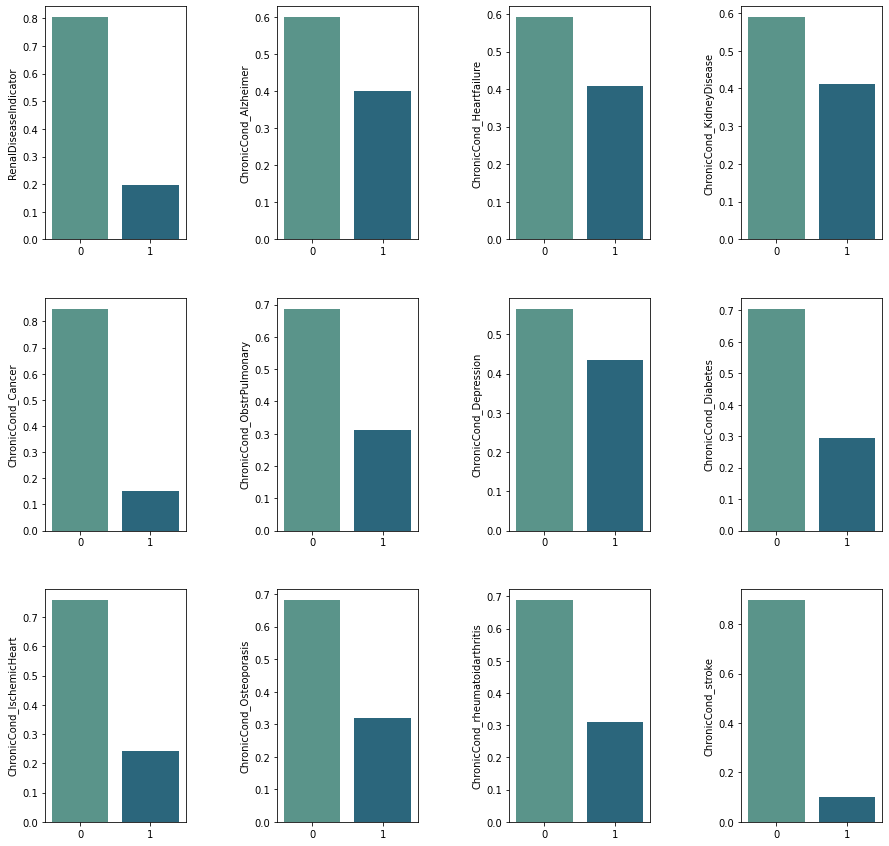

In [ ]:
vars= ['RenalDiseaseIndicator','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']
var_uni=[]
var_val=[]

for v in vars:
    var_uni.append(np.unique(train_fin2[v]))
    var_val.append(train_fin2[v].value_counts()/len(train_fin2[v]))
    
fig= plt.figure(figsize=(15,15))
gs= GridSpec(3,4,figure= fig)

ax=[]

for i in range(3):
    for j in range(4):
        ax.append(fig.add_subplot(gs[i,j]))

for k in range(len(ax)):
    sns.barplot(ax=ax[k],x= var_uni[k],y= var_val[k],palette='crest')
    #ax[k].title.set_text('Percentage distribution of the categories in the Variable')

plt.subplots_adjust(wspace=0.65)
plt.subplots_adjust(hspace=0.25)
#plt.xlabel("NA Percentage in each of the Datasets")
plt.show()

In [ ]:
print(np.unique(train_fin5['Race']))
print(train_fin5['Race'].value_counts())

[1 2 3 5]
1    471036
2     55640
3     19715
5     11820
Name: Race, dtype: int64


In [ ]:
train_fin2['Gender']= train_fin2['Gender'].map({1:'G1',2:'G2'})
train_fin2['Race']= train_fin2['Race'].map({1:'R1',2:'R2',3:'R3',5:'R4'})

cv_fin2['Gender']= train_fin2['Gender'].map({1:'G1',2:'G2'})
cv_fin2['Race']= train_fin2['Race'].map({1:'R1',2:'R2',3:'R3',5:'R4'})

In [ ]:
train_fin5.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,#_Procedures,#_DiagnosisCodes,HospitalWeeks,IllnessNature,ClaimWeeks,age,DGC_Yes,DGC_No,State_Yes,State_No,County_Yes,County_No,BID_Yes,BID_No,CID_Yes,CID_No,Pvr_Yes,Pvr_No,Ap_Yes,Ap_No,CADC_Yes,CADC_No
0,26000,1068.0,G1,R1,0,0,1,0,1,1,0,0,0,1,0,0,36000,3204,60,70,Yes,0.0,9.0,1.0,simple,1,66.9616,0.565891,0.434109,0.472063,0.527937,0.327133,0.672867,0.333333,0.666667,0.909091,0.090909,0.999066,0.000934,0.909091,0.090909,0.380952,0.619048
1,50,0.0,G1,R1,0,0,0,0,1,1,1,1,0,1,1,1,24000,2136,450,200,Yes,0.0,9.0,0.0,comorbid,0,77.6384,0.365811,0.634189,0.472063,0.527937,0.380747,0.619253,0.666667,0.333333,0.909091,0.090909,0.999066,0.000934,0.909091,0.090909,0.500000,0.500000
2,19000,1068.0,G2,R1,0,0,0,0,1,0,1,1,0,1,1,1,19000,1068,100,20,Yes,2.0,9.0,2.0,operating&comorbid,2,96.0658,0.600000,0.400000,0.472063,0.527937,0.327133,0.672867,0.500000,0.500000,0.909091,0.090909,0.999066,0.000934,0.909091,0.090909,0.409962,0.590038
3,17000,1068.0,G1,R1,0,1,1,1,1,1,1,1,0,0,1,1,17000,1068,1050,540,Yes,1.0,9.0,3.0,comorbid,3,87.2274,0.524138,0.475862,0.472063,0.527937,0.283846,0.716154,0.250000,0.750000,0.909091,0.090909,0.999066,0.000934,0.952381,0.047619,0.591331,0.408669
4,13000,1068.0,G2,R1,0,1,0,1,1,0,1,0,0,0,0,1,27000,2136,450,160,Yes,1.0,7.0,1.0,operating&comorbid,1,79.474,0.590909,0.409091,0.472063,0.527937,0.429422,0.570578,0.714286,0.285714,0.909091,0.090909,0.999066,0.000934,0.967742,0.032258,0.378525,0.621475


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin_n3.pkl','wb') as tr_df:
    pickle.dump(train_fin2,tr_df)
with open('/content/drive/MyDrive/Colab Notebooks/cv_fin_n3.pkl','wb') as cv_df:
    pickle.dump(cv_fin2,cv_df)

In [3]:
with open('/content/drive/MyDrive/Colab Notebooks/train_fin_n3.pkl','rb') as tr_df:
    train_fin3= pickle.load(tr_df)
with open('/content/drive/MyDrive/Colab Notebooks/cv_fin_n3.pkl','rb') as cv_df:
    cv_fin3= pickle.load(cv_df)

In [ ]:
train_fin3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446568 entries, 0 to 446567
Data columns (total 43 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           446568 non-null  int64  
 1   DeductibleAmtPaid                445852 non-null  float64
 2   Gender                           446568 non-null  object 
 3   Race                             446568 non-null  object 
 4   RenalDiseaseIndicator            446568 non-null  int64  
 5   ChronicCond_Alzheimer            446568 non-null  int64  
 6   ChronicCond_Heartfailure         446568 non-null  int64  
 7   ChronicCond_KidneyDisease        446568 non-null  int64  
 8   ChronicCond_Cancer               446568 non-null  int64  
 9   ChronicCond_ObstrPulmonary       446568 non-null  int64  
 10  ChronicCond_Depression           446568 non-null  int64  
 11  ChronicCond_Diabetes             446568 non-null  int64  
 12  Ch

#Multivariate Analysis

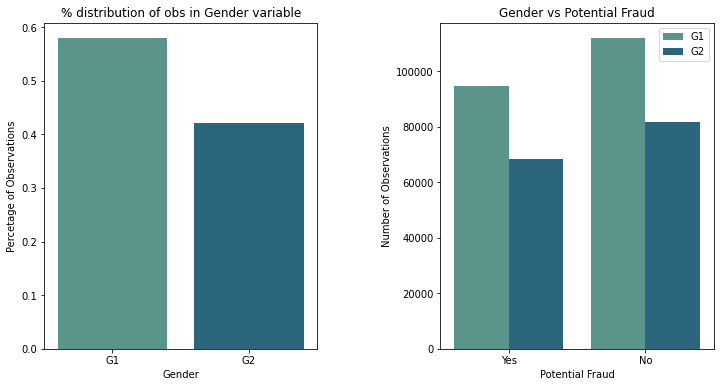

In [ ]:
fig=plt.figure(figsize=(12,6))
gs= GridSpec(1,2,figure= fig)
ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

sns.barplot(ax=ax1,x=np.unique(train_fin3['Gender']),y=train_fin3['Gender'].value_counts()/len(train_fin3['Gender']),palette='crest')
sns.countplot(x='PotentialFraud',hue='Gender',data=train_fin3, palette='crest', ax=ax2)

ax1.set_xlabel('Gender')
ax1.set_ylabel('Percetage of Observations')
ax1.set_title('% distribution of obs in Gender variable')

ax2.set_xlabel('Potential Fraud')
ax2.set_ylabel('Number of Observations')
ax2.set_title('Gender vs Potential Fraud')

plt.subplots_adjust(wspace=0.45)
plt.legend(labels= np.unique(train_fin3['Gender']))
plt.show()

##<font color='green'><b>**Observations**</b></font>
1. Gender 1 is dominant in the overall Gender variable
2. Gender 1 is the dominant of both the genders as majority of observations in both Fraud and Non-Fraud cases belong to Gender 1 confirming wiht point 1

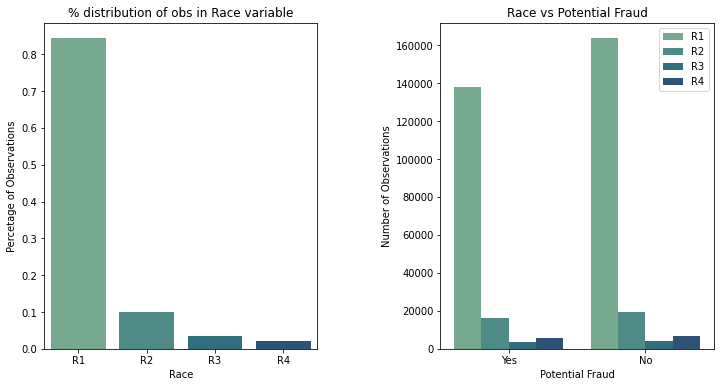

In [ ]:
fig=plt.figure(figsize=(12,6))
gs= GridSpec(1,2,figure= fig)
ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

sns.barplot(ax=ax1,x=np.unique(train_fin3['Race']),y=train_fin3['Race'].value_counts()/len(train_fin3['Race']),palette='crest')
sns.countplot(x='PotentialFraud',hue='Race',data=train_fin3, palette='crest', ax=ax2)

ax1.set_xlabel('Race')
ax1.set_ylabel('Percetage of Observations')
ax1.set_title('% distribution of obs in Race variable')

ax2.set_xlabel('Potential Fraud')
ax2.set_ylabel('Number of Observations')
ax2.set_title('Race vs Potential Fraud')

plt.subplots_adjust(wspace=0.45)
plt.legend(labels= np.unique(train_fin3['Race']))
plt.show()

##<font color='green'><b>**Observations**</b></font>
1.More than 80% of the observations belong to Race 1 as shown in fig.1

2.The distrbution of the observations across races in each of the PotentialFraud cases mirror the overall distribution of the Race variable

In [ ]:
train_fin6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 43 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                557312 non-null  float64
 2   Gender                           558211 non-null  object 
 3   Race                             558211 non-null  object 
 4   RenalDiseaseIndicator            558211 non-null  int64  
 5   ChronicCond_Alzheimer            558211 non-null  int64  
 6   ChronicCond_Heartfailure         558211 non-null  int64  
 7   ChronicCond_KidneyDisease        558211 non-null  int64  
 8   ChronicCond_Cancer               558211 non-null  int64  
 9   ChronicCond_ObstrPulmonary       558211 non-null  int64  
 10  ChronicCond_Depression           558211 non-null  int64  
 11  ChronicCond_Diabetes             558211 non-null  int64  
 12  Ch

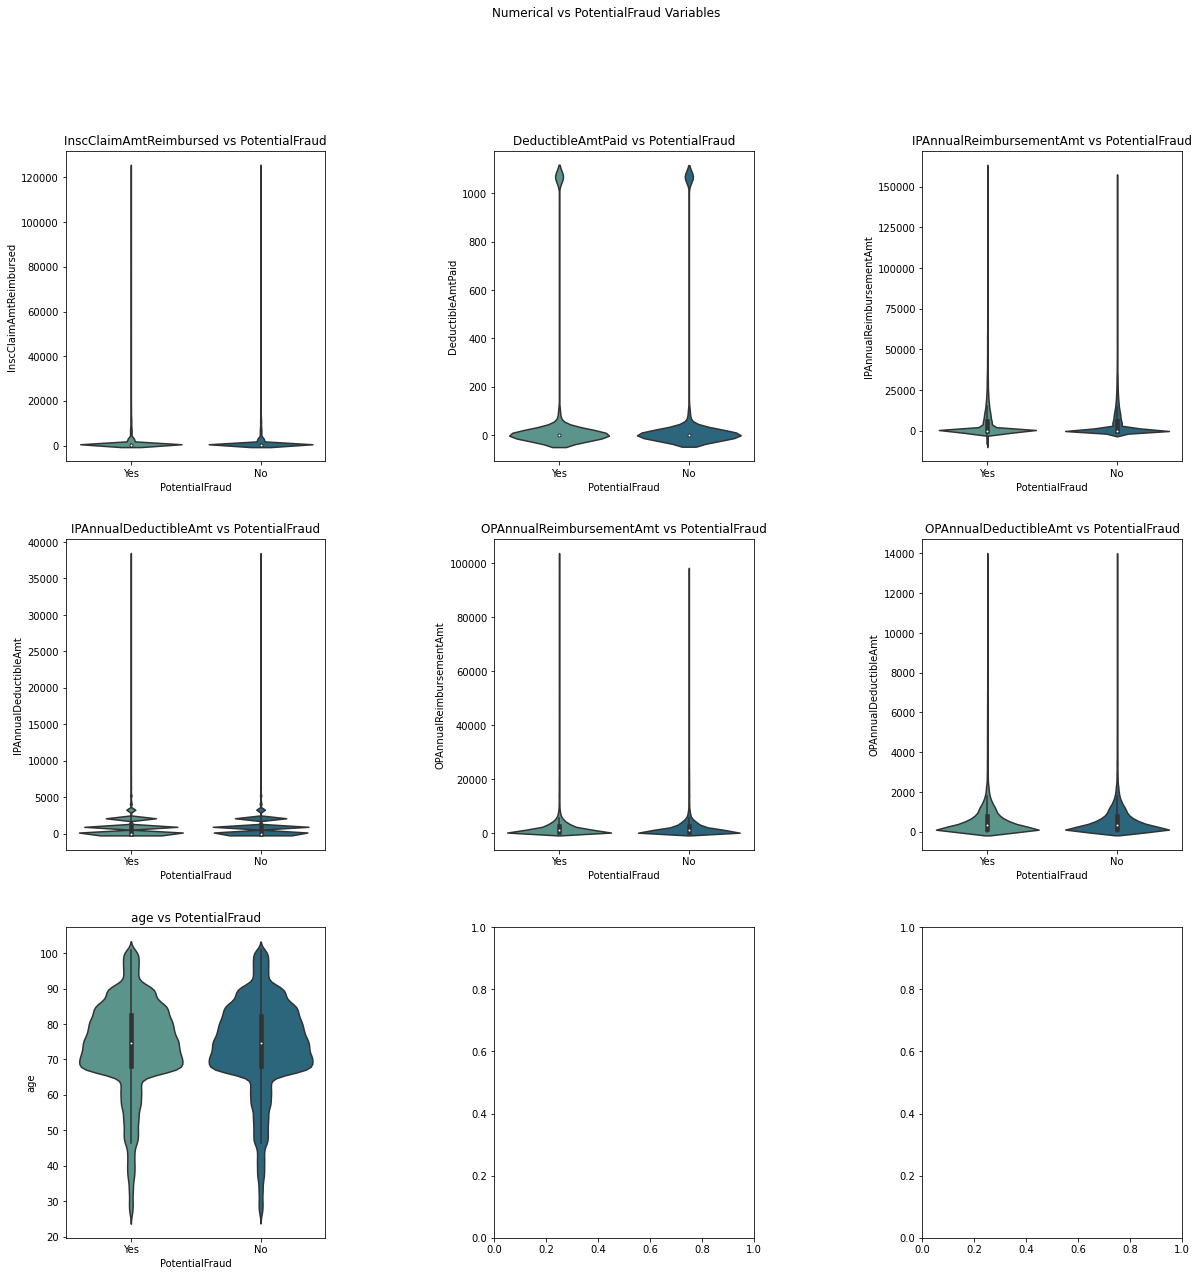

In [15]:
num_cols=['InscClaimAmtReimbursed','DeductibleAmtPaid','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','age']

ax=[]

fig= plt.figure(figsize=(20,20))
gs= GridSpec(3,3,figure= fig)
fig.suptitle('Numerical vs PotentialFraud Variables')

for i in range(3):
    for j in range(3):
        ax.append(fig.add_subplot(gs[i,j]))

for k in range(7):
    sns.violinplot(ax= ax[k],x='PotentialFraud',y=num_cols[k], data= train_fin3,palette='crest')
    ax[k].set_title('{} vs PotentialFraud'.format(num_cols[k]))

plt.subplots_adjust(wspace=0.65)
plt.subplots_adjust(hspace=0.25)
#plt.xlabel("NA Percentage in each of the Datasets")
plt.show()

##<font color='green'><b>**Observations**</b></font>
1. The above graphs compare the distribution of all the numerical variables aginst the number of classes in the Potential Fraud variable

2. The objective of the above graphs is to see if we could use the box plots to segment the observations within one of the classes of the PotentialFraud variable

3. None of the varibales in the above figures is creating a barrier or a level the effectively seperates out the 'Yes' and 'No' classes of the PotentialFraud variable

4. It is evident that none of the numerical variables are following a perfect normal distribution and are skewed with longer tails

5. The variables 'InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt','OPAnnualReimbursementAmt' are very dense around 0 and tapers off towards the tails which means that there fewer observations with increasing values of the variables

6. IPAnnualDeductibleAmt variable goes through various densisties with increasing value of the amount, this could be because the deductible amount is fixed and subscribed by the customer hence the grouping is happening at different levels of values of the Deductible Amount variable.

7. No inference can be drawn in terms of tagging an observation as Fraud and Non-Fraud just by looking at the distribution of the Age varible as the distribution of the Age variable is identical for both the classes of PotentialFraud


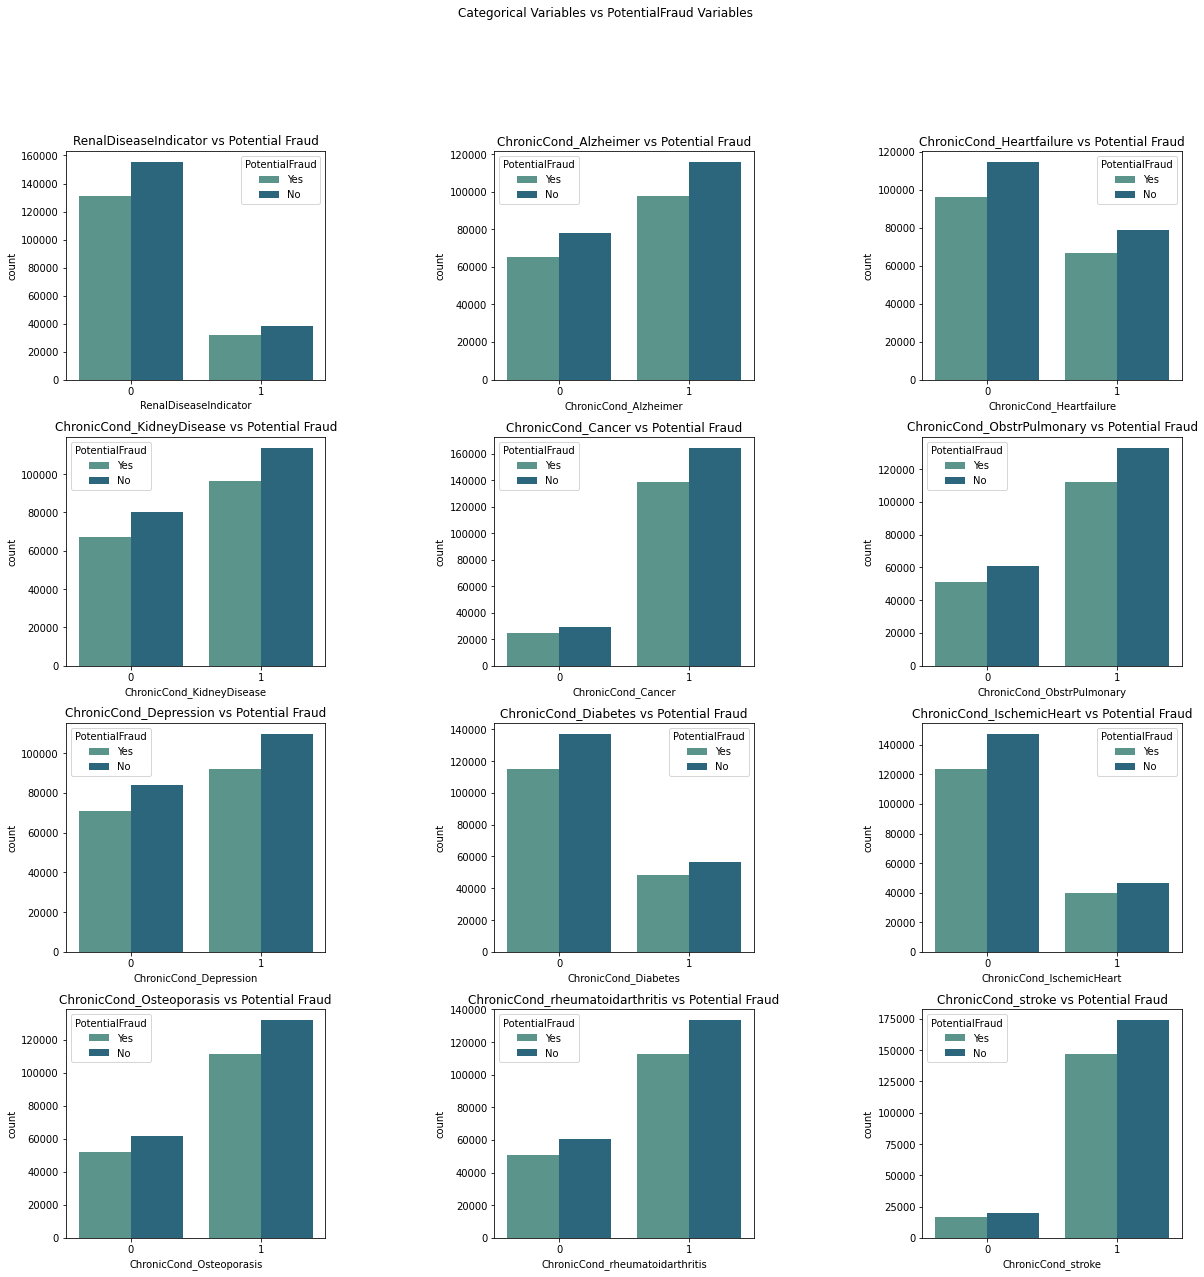

In [8]:
cat_cols= ['RenalDiseaseIndicator','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']
ax=[]

fig= plt.figure(figsize=(20,20))
gs= GridSpec(4,3,figure= fig)
fig.suptitle('Categorical Variables vs PotentialFraud Variables')

for i in range(4):
    for j in range(3):
        ax.append(fig.add_subplot(gs[i,j]))

for k in range(12):
    sns.countplot(x=cat_cols[k],hue='PotentialFraud',data=train_fin3, palette='crest', ax=ax[k])
    ax[k].set_title('{} vs Potential Fraud'.format(cat_cols[k]))

plt.subplots_adjust(wspace=0.65)
plt.subplots_adjust(hspace=0.25)
#plt.xlabel("NA Percentage in each of the Datasets")
plt.show()

##<font color='green'><b>**Observations**</b></font>
1. The above figures compare the distribution of the categorical variables against the number of classes in the Potential Fraud variable

2. The figure gives the counts of each of the classes associated to each of the 'Yes' and 'No' classes of the Potential Fruad variable

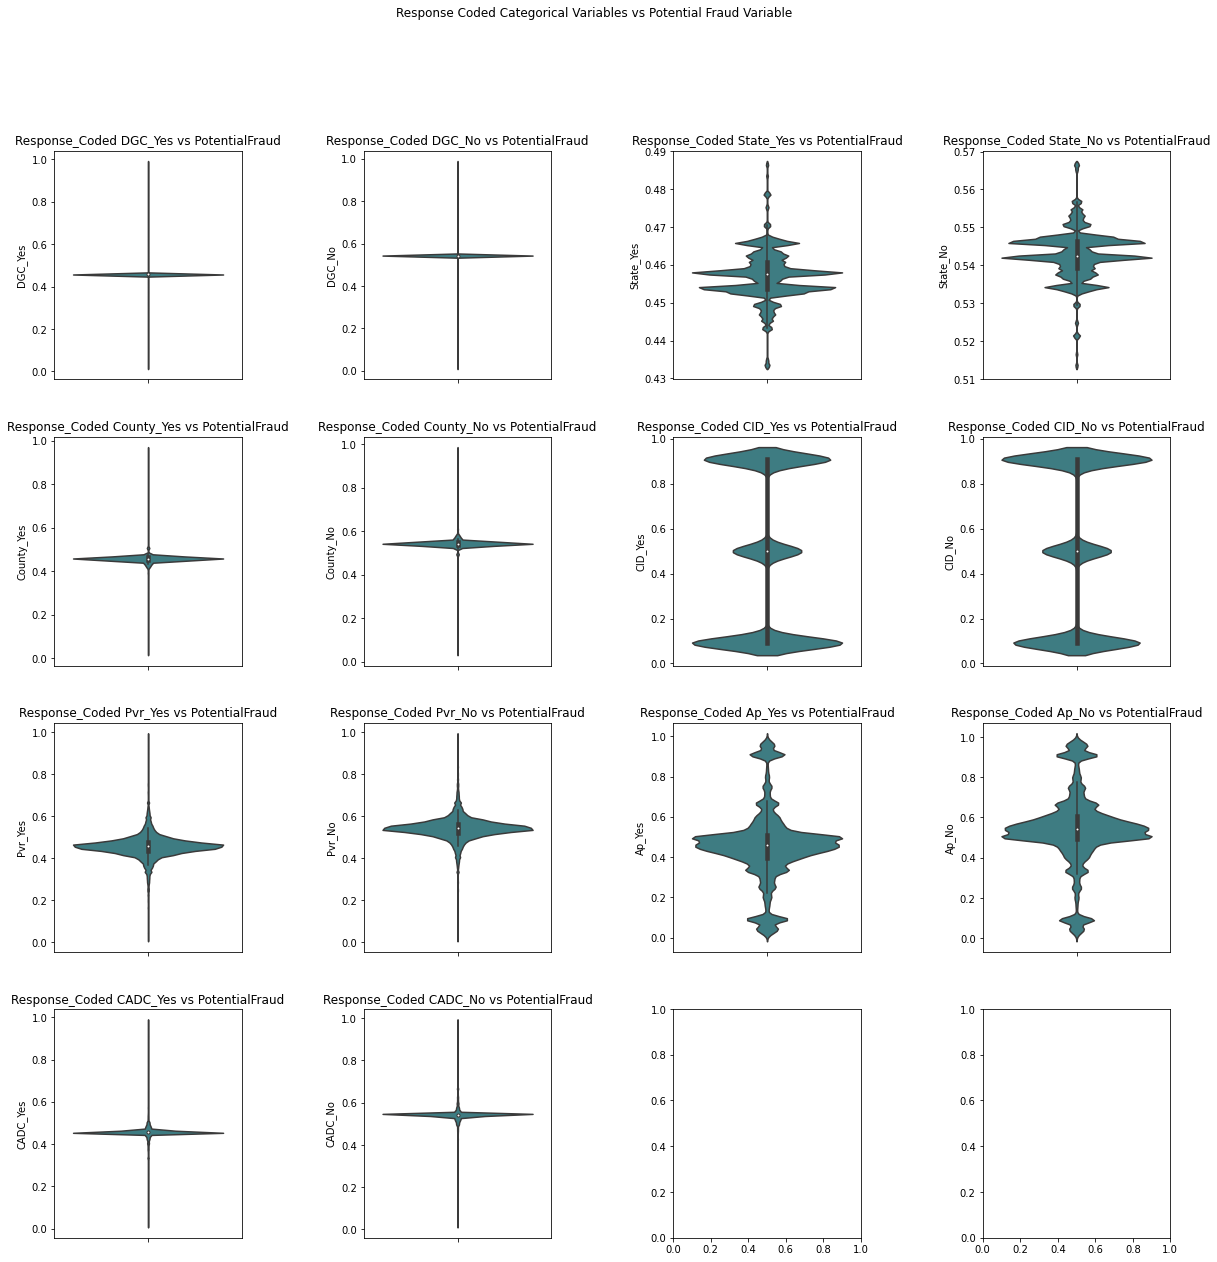

In [14]:
res_cols=['DGC_Yes','DGC_No','State_Yes','State_No','County_Yes','County_No','CID_Yes','CID_No','Pvr_Yes','Pvr_No','Ap_Yes','Ap_No','CADC_Yes','CADC_No']

ax=[]

fig= plt.figure(figsize=(20,20))
gs= GridSpec(4,4,figure= fig)
fig.suptitle('Response Coded Categorical Variables vs Potential Fraud Variable')

for i in range(4):
    for j in range(4):
        ax.append(fig.add_subplot(gs[i,j]))

for k in range(14):
    sns.violinplot(ax= ax[k],y=res_cols[k], data= train_fin3,palette='crest')
    ax[k].set_title('Response_Coded {} vs PotentialFraud'.format(res_cols[k]))

plt.subplots_adjust(wspace=0.65)
plt.subplots_adjust(hspace=0.25)

plt.show()

##<font color='green'><b>**Observations**</b></font>
1. The above graphs compare the distribution of all the variables which have gone through Response Coding aginst the number of classes in the Potential Fraud variable

2. The variables DiagnosisGroupCodes(DGC),County,Provider(Pvr) and ClaimAdmitDiagnosisCodes(CADC) are very dense around a small number of values. These values do not effectively segregate the PotentialFraud classes.

3. The variables State, AttendingPhysician and ClaimID are densely distributed around some values. For example, for the state variable there a few states where the number of observations are very high which could be due to the size of the states as some states could have more number of people than the others

4. Similarly, ClaimID variable has higher densities around 3 different groups of claimIDs

In [ ]:
num_cols=['InscClaimAmtReimbursed','DeductibleAmtPaid','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','age']

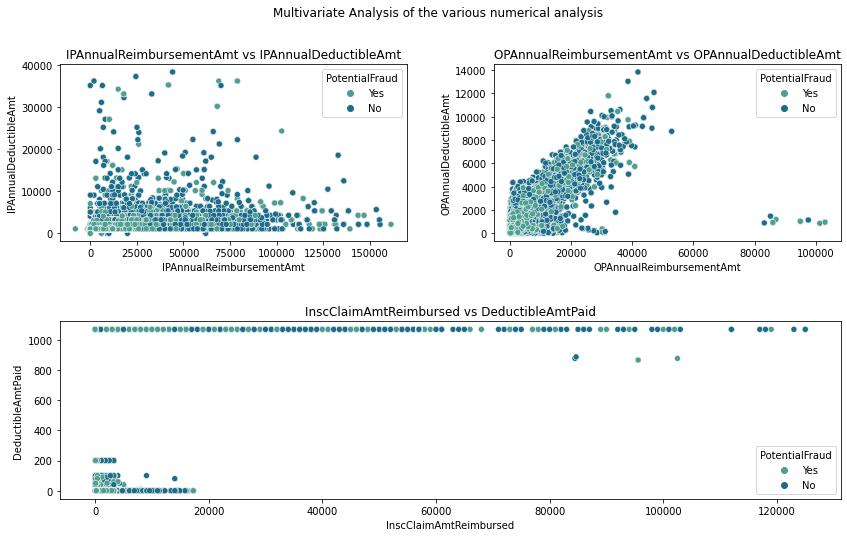

In [18]:
fig= plt.figure(figsize=(14,8))
gs= GridSpec(2,2,figure=fig)

fig.suptitle('Multivariate Analysis of the various numerical analysis')

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,:])

#sns.scatterplot(x='InscClaimAmtReimbursed',y='age', hue='PotentialFraud',data=train_fin3,ax=ax1,palette='crest')
sns.scatterplot(x='InscClaimAmtReimbursed',y='DeductibleAmtPaid', hue='PotentialFraud',data=train_fin3,ax=ax3,palette='crest')
sns.scatterplot(x='IPAnnualReimbursementAmt',y='IPAnnualDeductibleAmt', hue='PotentialFraud',data=train_fin3,ax=ax1,palette='crest')
sns.scatterplot(x='OPAnnualReimbursementAmt',y='OPAnnualDeductibleAmt', hue='PotentialFraud',data=train_fin3,ax=ax2,palette='crest')

#ax1.set_title('InscClaimAmtReimbursed vs Age')
ax3.set_title('InscClaimAmtReimbursed vs DeductibleAmtPaid')
ax1.set_title('IPAnnualReimbursementAmt vs IPAnnualDeductibleAmt')
ax2.set_title('OPAnnualReimbursementAmt vs OPAnnualDeductibleAmt')

plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.45)

plt.show()

##<font color='purple'><b>Definitions</b></font>
**Medical Reimbursement**: Healthcare reimbursement describes the payment that your hospital, doctor, diagnostic facility, or other healthcare providers receive for giving a medical service. Often, health insurer or a government payer covers the cost of all or part of the health care.

**Deductible**: If a health insurance plan has a deductible of 3000 dollars the insured/inidvidual will have to pay all the medical expenses until 3,000 dollars. Anything above $3000,the insurance will start paying for the services.

##<font color='green'><b>**Observations**</b></font>
1. **IPAnnualReimbursementAmt vs IPAnnualDeductibleAmt:** From the above definition, we see from a high desnity that the Inpatient deductible amount is fixed in between and 0 and 10000 dollars. Due to the same reason we see a lot of grouping of points at the bottom half of the plot.

2. **OPAnnualReimbursementAmt vs OPAnnualDeductibleAmt:** There is a clear increasing trend and a very disticnt grouping of the observations tagged as Fraud in the bottom part of the plot. **The ranges for most of the Fraud cases are in the region where Deductible amount is between 0 and 3,000 dollars and the Reimbursement amount between 0 and 10,000 dollars.**

3. **InscClaimAmtReimbursed vs DeductibleAmtPaid:** This plot clealy shows the ranges of Deductible amout paid. We see grouping of observations at levels where deductible amount is 0-150 dollars, 200 dollars and greater than 1000 dollars.

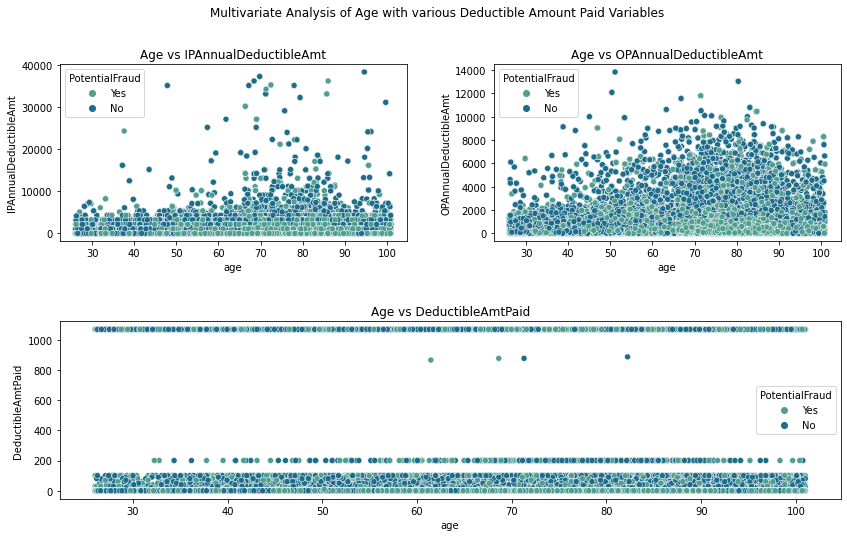

In [19]:
fig= plt.figure(figsize=(14,8))
gs= GridSpec(2,2,figure=fig)

fig.suptitle('Multivariate Analysis of Age with various Deductible Amount Paid Variables')

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,:])

#sns.scatterplot(x='InscClaimAmtReimbursed',y='age', hue='PotentialFraud',data=train_fin3,ax=ax1,palette='crest')
sns.scatterplot(x='age',y='DeductibleAmtPaid', hue='PotentialFraud',data=train_fin3,ax=ax3,palette='crest')
sns.scatterplot(x='age',y='IPAnnualDeductibleAmt', hue='PotentialFraud',data=train_fin3,ax=ax1,palette='crest')
sns.scatterplot(x='age',y='OPAnnualDeductibleAmt', hue='PotentialFraud',data=train_fin3,ax=ax2,palette='crest')

#ax1.set_title('InscClaimAmtReimbursed vs Age')
ax3.set_title('Age vs DeductibleAmtPaid')
ax1.set_title('Age vs IPAnnualDeductibleAmt')
ax2.set_title('Age vs OPAnnualDeductibleAmt')

plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.45)

plt.show()

##<font color='green'><b>**Observations**</b></font>

1. Although smal groups of fraud observations are seen in the age range of 45 to 90 years, fraud observations are spread across all the ranges of age as is quite evident from all the 3 plots above.

2. The distribution of the observations along the Y-axis seems to be in accordance with the levels that exist in the Deductible Amount Paid variable.

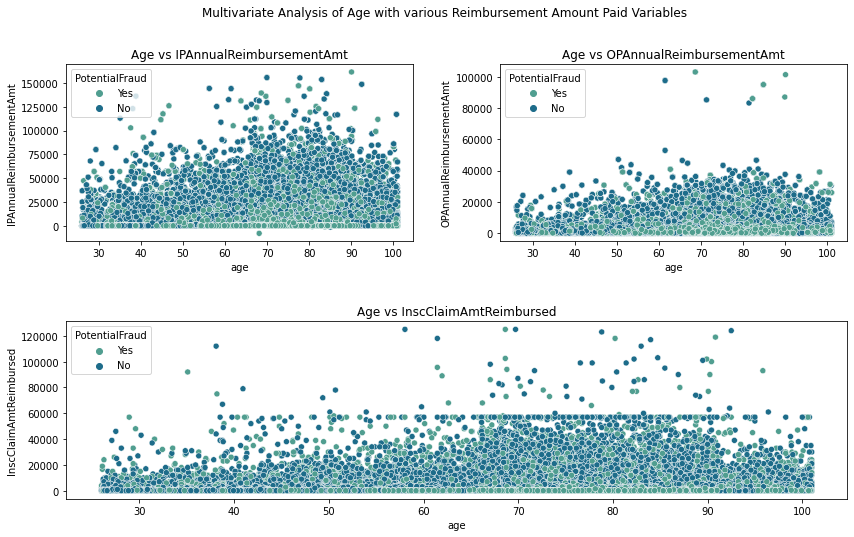

In [20]:
fig= plt.figure(figsize=(14,8))
gs= GridSpec(2,2,figure=fig)

fig.suptitle('Multivariate Analysis of Age with various Reimbursement Amount Paid Variables')

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,:])

#sns.scatterplot(x='InscClaimAmtReimbursed',y='age', hue='PotentialFraud',data=train_fin3,ax=ax1,palette='crest')
sns.scatterplot(x='age',y='InscClaimAmtReimbursed', hue='PotentialFraud',data=train_fin3,ax=ax3,palette='crest')
sns.scatterplot(x='age',y='IPAnnualReimbursementAmt', hue='PotentialFraud',data=train_fin3,ax=ax1,palette='crest')
sns.scatterplot(x='age',y='OPAnnualReimbursementAmt', hue='PotentialFraud',data=train_fin3,ax=ax2,palette='crest')

#ax1.set_title('InscClaimAmtReimbursed vs Age')
ax3.set_title('Age vs InscClaimAmtReimbursed')
ax1.set_title('Age vs IPAnnualReimbursementAmt')
ax2.set_title('Age vs OPAnnualReimbursementAmt')

plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.45)

plt.show()

##<font color='green'><b>**Observations**</b></font>

1. Very Similar observations as that of the above 'Age with various Deductible Amount Paid Variables' plot.

##**Converting the Python Notebook into a PDF Document**

In [24]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('EDA_PreProcessing.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.



ValueError: ignored